In [ ]:
!curl https://sdk.cloud.google.com | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   443  100   443    0     0   6205      0 --:--:-- --:--:-- --:--:--  6239
############################################################################################# 100.0%
Running install script from: /tmp/tmp.Vt5VkgIGe5/install_google_cloud_sdk.bash
which curl
curl -# -f https://dl.google.com/dl/cloudsdk/channels/rapid/google-cloud-sdk.tar.gz
############################################################################################# 100.0%

mkdir -p /root
"/root/google-cloud-sdk" already exists and may contain out of date files.
Remove /root/google-cloud-sdk or select a new installation directory, then run again.


In [ ]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=wKwpHATVqDEgc1ELfI5tEMf4GgRUgZ&prompt=consent&token_usage=remote&access_type=offline&code_challenge=XpE8RsEn8R5nh8_t9DLKI6B20ZvShqxZbE1Gd0Ug2P8&code_challenge_method=S256

Enter authorization code: 4/0AeaYSHBkSC7oM2hyXwpUDCEAimsbxA1OzR3kDc-A5enKJGmAlz5rRaZxK_8BW-zvaLfOXA

You are now logged in as [112001033@smail.iitpkd.ac.in].
Your current project is [None].  You can change this setting by running:
  $ gcloud config 

In [ ]:
!gcloud config set project ee-112001033

Updated property [core/project].


In [4]:
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-112001033')

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# GENERAL UTILITIES
import os
from glob import glob
import pandas as pd
from  tqdm.notebook import tqdm
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

# MODEL DEVELOPMENT DEPENDENCIES
import numpy as np
import pywt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
import datetime

# Get current date and format it
current_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Define image collection and filter by date (using current date)
dataset = ee.ImageCollection('EO1/HYPERION').filterDate(current_date, current_date)

# Select specific bands
rgb = dataset.select(['B050', 'B023', 'B015'])

# Define visualization parameters
rgbVis = {
  'min': 1000.0,
  'max': 14000.0,
  'gamma': 2.5
}

# Set map center
center = [162.0044, -77.3463]
zoom = 9

# Add RGB layer to the map
rgbMedian = rgb.median()
Map.addLayer(rgbMedian, rgbVis, 'RGB')

In [ ]:
import ee

# Authenticate to the Earth Engine servers
# ee.Initialize()

# Define the place name
place_name = "New York City"

# Define the region of interest (ROI) coordinates
roi = ee.Geometry.Point(76.4127, 10.7718)  # Coordinates for New York City

# Define the date range for filtering Hyperion imagery
start_date = '2000-02-22'
end_date = '2023-02-25'

# Load the Hyperion image collection
hyperion = ee.ImageCollection("EO1/HYPERION").filterDate(start_date, end_date)

# Filter the Hyperion image collection by the ROI and select the first image
hyperion_img = hyperion.filterBounds(roi).first()

# Get the metadata of the Hyperion image
hyperion_info = hyperion_img.getInfo()

# Get the band names of Hyperion
band_names = hyperion_img.bandNames().getInfo()

# Print the coordinates
print("Coordinates of", place_name, ":", roi.getInfo()['coordinates'])

# Print band names
print("Band names:", band_names)

# Extract band values for the ROI
band_values = hyperion_img.sample(roi, scale=30).getInfo()

# Print band values
print("Band values:", band_values['features'])


Coordinates of New York City : [76.4127, 10.7718]
Band names: ['B008', 'B009', 'B010', 'B011', 'B012', 'B013', 'B014', 'B015', 'B016', 'B017', 'B018', 'B019', 'B020', 'B021', 'B022', 'B023', 'B024', 'B025', 'B026', 'B027', 'B028', 'B029', 'B030', 'B031', 'B032', 'B033', 'B034', 'B035', 'B036', 'B037', 'B038', 'B039', 'B040', 'B041', 'B042', 'B043', 'B044', 'B045', 'B046', 'B047', 'B048', 'B049', 'B050', 'B051', 'B052', 'B053', 'B054', 'B055', 'B056', 'B057', 'B077', 'B078', 'B079', 'B080', 'B081', 'B082', 'B083', 'B084', 'B085', 'B086', 'B087', 'B088', 'B089', 'B090', 'B091', 'B092', 'B093', 'B094', 'B095', 'B096', 'B097', 'B098', 'B099', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117', 'B118', 'B119', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B128', 'B129', 'B130', 'B131', 'B132', 'B133', 'B134', 'B135', 'B136', 'B137', 'B138', 'B139', 'B140', 'B141', 'B142', 'B143', '

In [ ]:
# Iterate through band values

vals = []
dic_t = {}
for feature in band_values['features']:
    properties = feature['properties']
    for band_name, value in properties.items():
        vals.append(value)
        dic_t[band_name] = value

print(dic_t)

{'B008': 3912, 'B009': 3775, 'B010': 3742, 'B011': 3859, 'B012': 4061, 'B013': 4293, 'B014': 4115, 'B015': 4226, 'B016': 4484, 'B017': 4386, 'B018': 4769, 'B019': 4988, 'B020': 5352, 'B021': 5779, 'B022': 6144, 'B023': 6592, 'B024': 7169, 'B025': 7418, 'B026': 7984, 'B027': 7952, 'B028': 7891, 'B029': 8073, 'B030': 8271, 'B031': 7989, 'B032': 8432, 'B033': 8464, 'B034': 7822, 'B035': 7984, 'B036': 7787, 'B037': 6840, 'B038': 7479, 'B039': 8017, 'B040': 7684, 'B041': 5169, 'B042': 7644, 'B043': 7733, 'B044': 7372, 'B045': 7178, 'B046': 6317, 'B047': 5874, 'B048': 6256, 'B049': 6720, 'B050': 6650, 'B051': 6544, 'B052': 6341, 'B053': 6065, 'B054': 5321, 'B055': 4452, 'B056': 4074, 'B057': 3938, 'B077': 9674, 'B078': 8338, 'B079': 4110, 'B080': 4460, 'B081': 5302, 'B082': 7518, 'B083': 8725, 'B084': 10045, 'B085': 10710, 'B086': 10542, 'B087': 10336, 'B088': 10341, 'B089': 10229, 'B090': 10160, 'B091': 9504, 'B092': 9264, 'B093': 9208, 'B094': 8724, 'B095': 7774, 'B096': 6142, 'B097': 2931

In [ ]:
vals = [3828, 3758, 3793, 3965, 4057, 4344, 4132, 4208, 4346, 4253, 4475, 4549, 4719, 4857, 4877, 4919, 5031, 4990, 5224, 5070, 4931, 4984, 4941, 4750, 4992, 4938, 4474, 4457, 4145, 3472, 3933, 4426, 4155, 2873, 4246, 4214, 3970, 3828, 3151, 3010, 3274, 3667, 3689, 3638, 3550, 3395, 2735, 2254, 2013, 2103, 4561, 3849, 1689, 1729, 1890, 3144, 4204, 5168, 5675, 5646, 5632, 5488, 5264, 5137, 5036, 4762, 4689, 4315, 3550, 2448, 926, 412, 683, 690, 1361, 2380, 2775, 2832, 2888, 2900, 3204, 3417, 3567, 3528, 3252, 2819, 3164, 3166, 2799, 2328, 1855, 1245, 772, 173, 10, 8, 1, 1, 8, 10, 8, 29, 53, 162, 350, 251, 375, 746, 1315, 1701, 1955, 2121, 2210, 2253, 2287, 2075, 2007, 2087, 2022, 2037, 2086, 2064, 1960, 1897, 1929, 1879, 1855, 1782, 1686, 1611, 1493, 1367, 1271, 1207, 1038, 764, 504, 283, 80, 25, 10, 6, 23, 24, 14, 17, 1, 1, 1, 2, 1, 3, 30, 48, 115, 304, 467, 377, 96, 145, 424, 681, 635, 453, 501, 630, 724, 755, 774, 757, 760, 783, 778, 707, 659, 662, 631, 595, 575, 601, 607, 591, 549, 528, 512, 507, 471, 418, 434, 363, 372, 331, 268, 279, 259, 212, 194, 226]

In [ ]:
y = vals[:55]

In [ ]:
len(y)

55

In [ ]:
import numpy as np

initial_columns1 = range(int(426.82 * 100), int(930 * 100), int(10.1836 * 100))
initial_columns2 = range(int(912.45 * 100), int(954 * 100), int(10.09 * 100))
initial_columns = [x / 100 for x in initial_columns1] + [x / 100 for x in initial_columns2]
sorted_pairs = sorted(zip(initial_columns, y))
initial_columns, y = zip(*sorted_pairs)

target_columns = range(457, 705, 10)

data_interpolated = np.interp(target_columns, initial_columns, y)

print(data_interpolated)

[3958.91748527 4052.11984283 4323.70137525 4150.74263261 4199.93713163
 4328.9194499  4266.15520629 4439.6719057  4535.91552063 4685.93516699
 4827.71905697 4872.40275049 4908.60314342 5001.29469548 5001.59921415
 5153.66208251 5119.01375246 4977.69744597 4965.25736739 4956.96660118
 4824.29862475 4893.58349705 4960.91552063 4679.10805501 4464.81532417]


In [ ]:
agri = data_interpolated

In [ ]:
def load_data_1d(gt_file_path):

  labels = pd.read_csv(gt_file_path)
  train_data, test_data = train_test_split(labels, test_size=0.2)

  return train_data, test_data

In [ ]:
gt_data_path = "/content/drive/MyDrive/BTP/soilmoisture_dataset.csv"

# Loading training raw data
train_data, test_data = load_data_1d(gt_data_path)

In [ ]:
y_train = train_data[['soil_temperature', 'soil_moisture']]
y_test = test_data[['soil_temperature', 'soil_moisture']]
X_train = train_data.drop(columns=['index', 'datetime', 'soil_moisture', 'soil_temperature'])
X_test = test_data.drop(columns=['index', 'datetime', 'soil_moisture', 'soil_temperature'])

In [ ]:
initial_columns = range(454, 951, 4)
target_columns = range(457, 705, 10)

new_data = []

for index, row in X_train.iterrows():
    data_interpolated = np.interp(target_columns, initial_columns, row.values)
    new_data.append(data_interpolated)

column_names = [str(i) for i in range(457, 705, 10)]

new_data_ = []

for index, row in X_test.iterrows():
    data_interpolated = np.interp(target_columns, initial_columns, row.values)
    new_data_.append(data_interpolated)

# Create DataFrame
X_train1 = np.array(pd.DataFrame(new_data, columns=column_names))
X_test1 = np.array(pd.DataFrame(new_data_, columns=column_names))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train1 = scaler.fit_transform(X_train1)

# Transform the test data using the same scaler
X_test1 = scaler.transform(X_test1)

In [ ]:
desert2 = desert1 / 35000

In [ ]:
desert3 = scaler.transform([desert2])

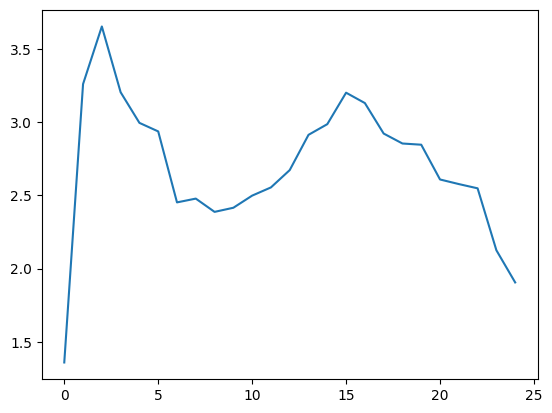

In [ ]:
plt.plot(desert3[0])

In [ ]:
agri1 = (agri - 3000) / 10000

In [ ]:
agri2 = scaler.transform([agri1])

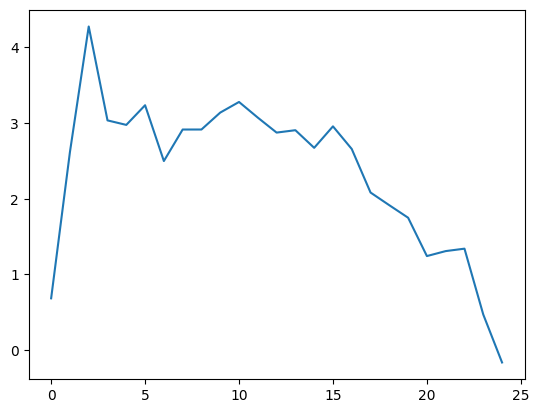

In [ ]:
plt.plot(agri2[0])

In [ ]:
import tensorflow as tf

loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/BTP/Temp_mois2_Model")

In [ ]:
loaded_model.predict(desert3)

1/1 [==============================] - 0s 403ms/step


array([[32.34349, 35.0037 ]], dtype=float32)

In [ ]:
loaded_model.predict(agri2)

1/1 [==============================] - 0s 34ms/step


array([[25.436779, 37.63877 ]], dtype=float32)

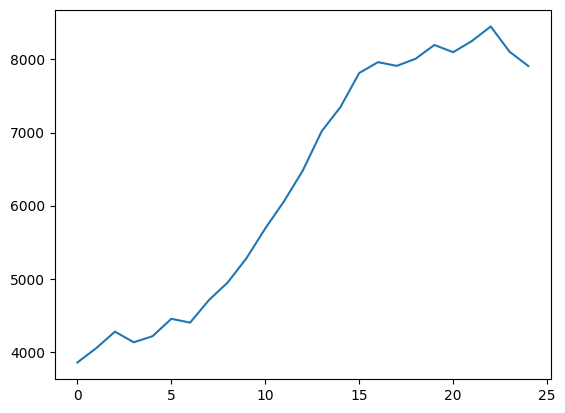

In [ ]:
desert = np.array([3854.86247544, 4050.2848723, 4276.5913556, 4130.7367387, 4214.22396857, 4452.06679764, 4399.86247544, 4708.05108055, 4949.27701375, 5281.20235756, 5688.39882122, 6060.10019646, 6481.10019646, 7015.96463654, 7347.55599214, 7813.86640472, 7962.18467583, 7911.49312377, 8008.63850688, 8197.47937132, 8098.69744597, 8251.84086444, 8450.42043222, 8105.79174853, 7909.52455796, 7881.04911591, 7308.84872299, 7151.33988212, 7731.61689587, 7866.52848723, 6592.02554028, 6199.84479371, 7679.49508841, 7595.4086444, 7301.4891945, 6880.28683694, 6171.65422397, 5992.57760314, 6391.82711198, 6700.74656189, 6622.71905697, 6495.34381139, 6279.72691552, 5912.98428291, 5158.80943026, 4328.69735007, 7410.51977401, 8591.44778255, 4261.58572844, 4817.16154609])
desert1 = desert[:25]
plt.plot(desert[:25])

In [ ]:
initial_columns = range(454, 951, 4)
target_columns = range(457, 948, 10)

new_data = []
X_train = train_data.drop(columns=['index', 'datetime', 'soil_moisture', 'soil_temperature'])
for index, row in X_train.iterrows():
    data_interpolated = np.interp(target_columns, initial_columns, row.values)
    new_data.append(data_interpolated)

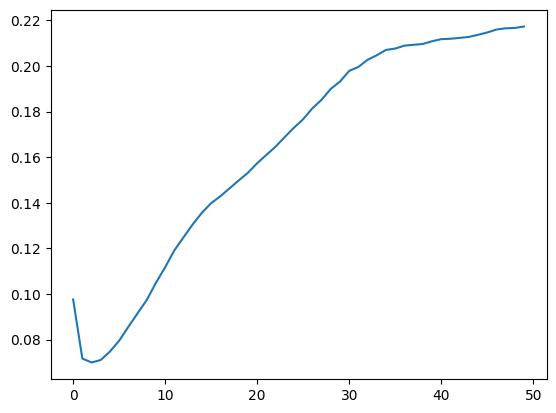

In [ ]:
plt.plot(list(new_data[70]))

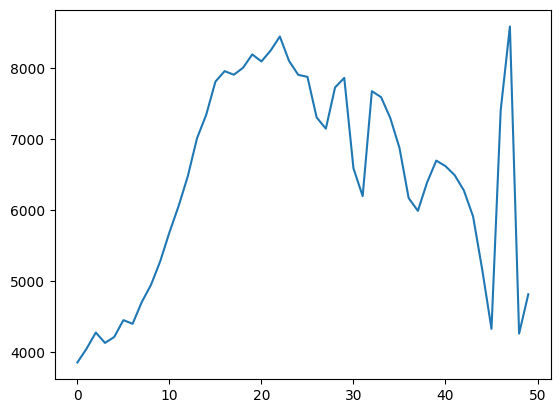

In [ ]:
plt.plot(data_interpolated)

In [ ]:
# Get the date of the Hyperion image
image_date = hyperion_img.date().format('YYYY-MM-dd').getInfo()
print("Date of the selected Hyperion image:", image_date)

Date of the selected Hyperion image: 2010-05-26


In [ ]:
import ee

# Authenticate to the Earth Engine servers
# ee.Initialize()

# Define the place name
place_name = "New York City"

# Get the region of interest (ROI) coordinates
# roi = ee.Geometry.Point(-73.935242, 40.730610)  # Coordinates for New York City
roi = ee.Geometry.Point(-72.366, 19.121) #palakkad
# Load the Hyperion image collection
hyperion = ee.ImageCollection("EO1/HYPERION")

# Filter the Hyperion image collection by the ROI and select the first image
hyperion_img = hyperion.filterBounds(roi).first()

# Define the start and end dates for filtering
start_date = '2017-01-01'
end_date = '2017-12-31'

# Filter the Hyperion image collection by the date range
hyperion_filtered = hyperion.filterDate(start_date, end_date)

# Select the first image in the filtered collection
hyperion_img_filtered = hyperion_filtered.first()

# Get the metadata of the Hyperion image
hyperion_info = hyperion_img.getInfo()

# Get the band names of Hyperion
band_names = hyperion_img.bandNames()

# Print the coordinates
print("Coordinates of", place_name, ":", roi.getInfo()['coordinates'])

# Print band names
print("Band names:", band_names.getInfo())

# Extract band values for the ROI
band_values = hyperion_img.sample(roi, 30).getInfo()

# Print band values
print("Band values:", band_values)


Coordinates of New York City : [-72.366, 19.121]
Band names: ['B008', 'B009', 'B010', 'B011', 'B012', 'B013', 'B014', 'B015', 'B016', 'B017', 'B018', 'B019', 'B020', 'B021', 'B022', 'B023', 'B024', 'B025', 'B026', 'B027', 'B028', 'B029', 'B030', 'B031', 'B032', 'B033', 'B034', 'B035', 'B036', 'B037', 'B038', 'B039', 'B040', 'B041', 'B042', 'B043', 'B044', 'B045', 'B046', 'B047', 'B048', 'B049', 'B050', 'B051', 'B052', 'B053', 'B054', 'B055', 'B056', 'B057', 'B077', 'B078', 'B079', 'B080', 'B081', 'B082', 'B083', 'B084', 'B085', 'B086', 'B087', 'B088', 'B089', 'B090', 'B091', 'B092', 'B093', 'B094', 'B095', 'B096', 'B097', 'B098', 'B099', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117', 'B118', 'B119', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B128', 'B129', 'B130', 'B131', 'B132', 'B133', 'B134', 'B135', 'B136', 'B137', 'B138', 'B139', 'B140', 'B141', 'B142', 'B143', 'B

In [ ]:
import ee

# Authenticate to the Earth Engine servers
ee.Initialize()

# Define the place name
place_name = "New York City"

# Get the region of interest (ROI) coordinates
roi = ee.Geometry.Point(76.4127, 10.7718)  # Coordinates for New York City

# Load the Hyperion image collection
hyperion = ee.ImageCollection("EO1/HYPERION")

# Filter the Hyperion image collection by the ROI and date range
start_date = '2016-01-01'
end_date = '2017-12-31'
hyperion_filtered = hyperion.filterBounds(roi).filterDate(start_date, end_date)

# Function to extract band values for a given image
def get_band_value(image):
    band_value = image.reduceRegion(ee.Reducer.first(), roi, 30).get('B023')
    return image.set('date', image.date().format()).set('B023', band_value)

# Map over the image collection to get band values for Band 23 for each date
band_values = hyperion_filtered.map(get_band_value)

# Print band values for each date
print("Band values for B023 for each date:")
for feature in band_values.getInfo()['features']:
    date = feature['properties']['date']
    value = feature['properties']['B023']
    print(f"Date: {date} | Band value: {value}")


Band values for B023 for each date:


In [ ]:
!pip install folium

In [ ]:
import ee
import folium

# Authenticate to the Earth Engine servers
# ee.Initialize()

# Define the place name
place_name = "New York City"

# Get the region of interest (ROI) coordinates
roi = ee.Geometry.Point(76.4127, 10.7718)  # Coordinates for New York City

# Define the date range for filtering Hyperion imagery
start_date = '2000-02-22'
end_date = '2023-02-25'

# Load the Hyperion image collection
hyperion = ee.ImageCollection("EO1/HYPERION").filterDate(start_date, end_date)

# Filter the Hyperion image collection by the ROI and select the first image
hyperion_img = hyperion.filterBounds(roi).first()

# Get the thumbnail URL of the Hyperion image
thumbnail_url = hyperion_img.getThumbURL({'bands': ['B023', 'B050', 'B014'], 'min': 0, 'max': 6000, 'gamma' : 2.5, 'scale': 50})

# Get the coordinates for the geometry
coords = roi.coordinates().getInfo()

# Create a folium map centered around the coordinates
map = folium.Map(location=[coords[1], coords[0]], zoom_start=12)

# Add the Hyperion image as a thumbnail overlay to the map
folium.Marker(location=[coords[1], coords[0]], popup=place_name).add_to(map)
folium.TileLayer(thumbnail_url, attr="Hyperion Image", name="Hyperion Image").add_to(map)
print(thumbnail_url)

# Display the map
display(map)


https://earthengine.googleapis.com/v1/projects/ee-112001033/thumbnails/db8f9b898c356dbf6c463f135a02d4d6-e88db247f0477be623450e23a19d376a:getPixels


In [ ]:
import ee
import folium
import numpy as np

# Authenticate to the Earth Engine servers
# ee.Initialize()

# Define the place name
place_name = "New York City"

center_coords = [36.36, -120.06]
center_coords = [76.4127, 10.7718]

# Define the radius of the circular ROI (in meters)
radius = 100  # Change this value to your desired radius

# Create a circular region of interest (ROI) centered at the given coordinates
roi = ee.Geometry.Point(center_coords).buffer(radius)

# Define the date range for filtering Hyperion imagery
start_date = '2000-02-22'
end_date = '2023-02-25'

# Load the Hyperion image collection
hyperion = ee.ImageCollection("EO1/HYPERION").filterDate(start_date, end_date)

# Filter the Hyperion image collection by the ROI and select the first image
hyperion_img = hyperion.filterBounds(roi).limit(5000).first()

# Get the thumbnail URL of the Hyperion image
thumbnail_url = hyperion_img.getThumbURL({'bands': ['B023', 'B050', 'B014'], 'min': 0, 'max': 6000, 'gamma' : 2.5, 'scale': 50})
print(thumbnail_url)

# Get the coordinates for the geometry
coords = roi.coordinates().getInfo()
print(len(coords[0]))

# Create a folium map centered around the coordinates
map = folium.Map(location=[coords[0][0][1], coords[0][0][0]], zoom_start=12)

# Add the Hyperion image as a thumbnail overlay to the map
folium.Marker(location=[coords[0][0][1], coords[0][0][0]], popup=place_name).add_to(map)
folium.TileLayer(thumbnail_url, attr="Hyperion Image", name="Hyperion Image").add_to(map)

# Get pixel values for the entire patch
patch_values = hyperion_img.sample(region=roi, scale=30).getInfo()
print(patch_values)

# Extract band values from the patch values
band_values = np.array([[pixel['properties'][f'B{band:03d}'] for band in range(11, 58)] for pixel in patch_values['features']])

# Determine the dimensions of the image
num_rows = hyperion_img.getInfo()['bands'][0]['dimensions'][0]
num_cols = hyperion_img.getInfo()['bands'][0]['dimensions'][1]

# print
print((band_values))
# df = pd.DataFrame(band_values)
# Display the map
display(map)

# Print the shape of the band values 3D array
# print("Shape of band values 3D array:", band_values_3d.shape)


https://earthengine.googleapis.com/v1/projects/ee-112001033/thumbnails/a9a21d9925f0f4522a16747d7be7274d-00a950b609c2b948762ef635df59d801:getPixels
24
{'type': 'FeatureCollection', 'columns': {'B008': 'Short', 'B009': 'Short', 'B010': 'Short', 'B011': 'Short', 'B012': 'Short', 'B013': 'Short', 'B014': 'Short', 'B015': 'Short', 'B016': 'Short', 'B017': 'Short', 'B018': 'Short', 'B019': 'Short', 'B020': 'Short', 'B021': 'Short', 'B022': 'Short', 'B023': 'Short', 'B024': 'Short', 'B025': 'Short', 'B026': 'Short', 'B027': 'Short', 'B028': 'Short', 'B029': 'Short', 'B030': 'Short', 'B031': 'Short', 'B032': 'Short', 'B033': 'Short', 'B034': 'Short', 'B035': 'Short', 'B036': 'Short', 'B037': 'Short', 'B038': 'Short', 'B039': 'Short', 'B040': 'Short', 'B041': 'Short', 'B042': 'Short', 'B043': 'Short', 'B044': 'Short', 'B045': 'Short', 'B046': 'Short', 'B047': 'Short', 'B048': 'Short', 'B049': 'Short', 'B050': 'Short', 'B051': 'Short', 'B052': 'Short', 'B053': 'Short', 'B054': 'Short', 'B055': '

In [ ]:
len(band_values)

5

In [ ]:
band_values[0]

array([2387, 2363, 2456, 2221, 2178, 2122, 1990, 2071, 2055, 2037, 2023,
       1908, 1827, 1804, 1714, 1769, 1690, 1623, 1607, 1583, 1487, 1523,
       1514, 1402, 1518, 1818, 1704, 2113, 2595, 2564, 1754, 2654, 2680,
       2529, 2479, 2068, 1941, 2169, 2488, 2547, 2491, 2448, 2325, 1867,
       1429, 1101, 1052])

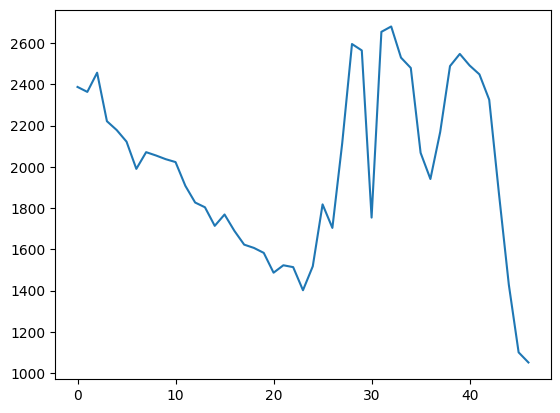

In [ ]:
plt.plot(band_values[0])

In [ ]:
dates = []
for pixel in patch_values['features']:
    if 'system:time_start' in pixel['properties']:
        date = ee.Date(pixel['properties']['system:time_start']).format('YYYY-MM-dd').getInfo()
        dates.append(date)
print("Dates of captured moments:")
print(dates)

Dates of captured moments:
[]


In [ ]:
import ee
import folium
import numpy as np

# Authenticate to the Earth Engine servers
# ee.Initialize()

# Define the place name
place_name = "New York City"

center_coords = [76.5, 11.8]

# Define the radius of the circular ROI (in meters)
radius = 5000  # Change this value to your desired radius

# Create a circular region of interest (ROI) centered at the given coordinates
roi = ee.Geometry.Point(center_coords).buffer(radius)

# Define the date range for filtering Hyperion imagery
start_date = '2000-02-22'
end_date = '2023-02-25'

# Load the Hyperion image collection
hyperion = ee.ImageCollection("EO1/HYPERION").filterDate(start_date, end_date)

# Filter the Hyperion image collection by the ROI and select the first image
hyperion_img = hyperion.filterBounds(roi).limit(5000).first()

# Get the thumbnail URL of the Hyperion image
thumbnail_url = hyperion_img.getThumbURL({'bands': ['B023', 'B050', 'B014'], 'min': 0, 'max': 6000, 'gamma' : 2.5, 'scale': 50})
print(thumbnail_url)

# Get the coordinates for the geometry
coords = roi.coordinates().getInfo()
print(len(coords[0]))

# Create a folium map centered around the coordinates
map = folium.Map(location=[coords[0][0][1], coords[0][0][0]], zoom_start=12)

# Add the Hyperion image as a thumbnail overlay to the map
folium.Marker(location=[coords[0][0][1], coords[0][0][0]], popup=place_name).add_to(map)
folium.TileLayer(thumbnail_url, attr="Hyperion Image", name="Hyperion Image").add_to(map)

# Get pixel values for the entire patch
patch_values = hyperion_img.sample(region=roi, scale=50).getInfo()
print(patch_values)

# Extract band values from the patch values
band_values = np.array([[pixel['properties'][f'B{band:03d}'] for band in (range(8, 58) and range(78, 224))] for pixel in patch_values['features']])

# Determine the dimensions of the image
num_rows = hyperion_img.getInfo()['bands'][0]['dimensions'][0]
num_cols = hyperion_img.getInfo()['bands'][0]['dimensions'][1]

# print
print((band_values[100]))
df = pd.DataFrame(band_values)
# Display the map
display(map)

# Print the shape of the band values 3D array
# print("Shape of band values 3D array:", band_values_3d.shape)


https://earthengine.googleapis.com/v1/projects/ee-112001033/thumbnails/343bbb438979a99b5d13539db92b912a-2ee1ebe163b3f4c103dd22469ae1e161:getPixels
24


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[3965 1845 1685 1760 2627 3658 4656 5340 5405 5481 5422 5246 5245 5197
 4965 4857 4524 3735 2707 1299  609  785  837 1191 2015 2422 2423 2555
 2554 2790 3035 3283 3281 3018 2632 2808 2858 2541 2039 1565 1104  723
  394  210  199  175  178  188  188  209  212  175  200  246  223  233
  336  532  699  800  905 1006 1068 1105 1031 1018 1075 1058 1054 1121
 1136 1094 1095 1062 1019 1011  994  942  873  796  731  669  630  553
  437  324  224  109   77   63   64   68   72   77   75   50   52   55
   57   24   22   48   48   31   73  130  128   48   49  111  177  172
  123  141  180  208  223  247  254  208  232  250  232  217  221  219
  223  194  208  211  209  184  168  168  168  160  143  118  107  128
  115   90   98   96   96   29]


Map(center=[28.934799, 78.948349], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Sear…

Clicked coordinates: [28.925918074455, 78.94767225205464]


Band values: [2609, 2726, 2650, 2710, 2743, 2795, 2564, 2494, 2441, 2280, 2316, 2273, 2217, 2162, 1992, 1859, 1792, 1718, 1671, 1608, 1484, 1461, 1392, 1313, 1327, 1278, 1167, 1256, 1521, 1533, 2081, 2676, 2702, 1836, 2801, 2810, 2603, 2507, 2054, 1921, 2116, 2429, 2408, 2381, 2324, 2167, 1735, 1317, 1199, 1185, 2806, 2400, 987, 929, 1079, 1699, 2263, 2788, 3311, 3332, 3354, 3409, 3314, 3314, 3131, 2928, 2873, 2684, 2262, 1606, 707, 250, 343, 376, 625, 1154, 1338, 1287, 1330, 1345, 1520, 1636, 1695, 1659, 1498, 1269, 1426, 1476, 1344, 1065, 829, 576, 340, 116, 12, 12, 1, 1, 1, 1, 6, 10, 12, 15, 43, 26, 46, 87, 186, 248, 285, 331, 401, 427, 425, 410, 413, 438, 434, 431, 477, 490, 452, 445, 456, 471, 442, 438, 393, 371, 356, 315, 299, 279, 237, 190, 127, 80, 29, 13, 41, 36, 11, 9, 1, 1, 7, 6, 5, 5, 1, 1, 3, 7, 9, 11, 7, 2, 1, 1, 26, 47, 4, 2, 34, 39, 43, 48, 69, 72, 60, 62, 85, 83, 65, 64, 85, 84, 76, 87, 88, 85, 54, 49, 73, 68, 50, 40, 46, 41, 53, 44, 32, 31, 27, 21, 57, 82]


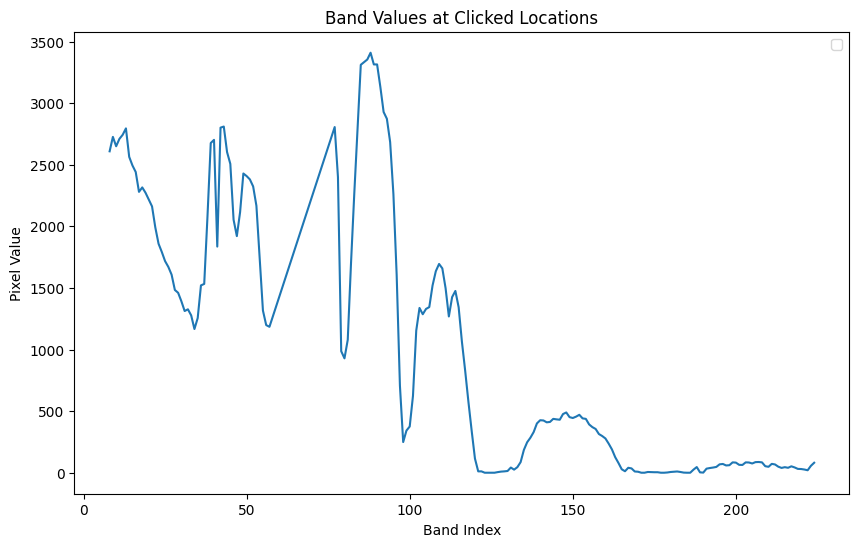

Clicked coordinates: [28.92593216000745, 78.94797256857898]


Band values: [2609, 2726, 2650, 2710, 2743, 2795, 2564, 2494, 2441, 2280, 2316, 2273, 2217, 2162, 1992, 1859, 1792, 1718, 1671, 1608, 1484, 1461, 1392, 1313, 1327, 1278, 1167, 1256, 1521, 1533, 2081, 2676, 2702, 1836, 2801, 2810, 2603, 2507, 2054, 1921, 2116, 2429, 2408, 2381, 2324, 2167, 1735, 1317, 1199, 1185, 2806, 2400, 987, 929, 1079, 1699, 2263, 2788, 3311, 3332, 3354, 3409, 3314, 3314, 3131, 2928, 2873, 2684, 2262, 1606, 707, 250, 343, 376, 625, 1154, 1338, 1287, 1330, 1345, 1520, 1636, 1695, 1659, 1498, 1269, 1426, 1476, 1344, 1065, 829, 576, 340, 116, 12, 12, 1, 1, 1, 1, 6, 10, 12, 15, 43, 26, 46, 87, 186, 248, 285, 331, 401, 427, 425, 410, 413, 438, 434, 431, 477, 490, 452, 445, 456, 471, 442, 438, 393, 371, 356, 315, 299, 279, 237, 190, 127, 80, 29, 13, 41, 36, 11, 9, 1, 1, 7, 6, 5, 5, 1, 1, 3, 7, 9, 11, 7, 2, 1, 1, 26, 47, 4, 2, 34, 39, 43, 48, 69, 72, 60, 62, 85, 83, 65, 64, 85, 84, 76, 87, 88, 85, 54, 49, 73, 68, 50, 40, 46, 41, 53, 44, 32, 31, 27, 21, 57, 82]


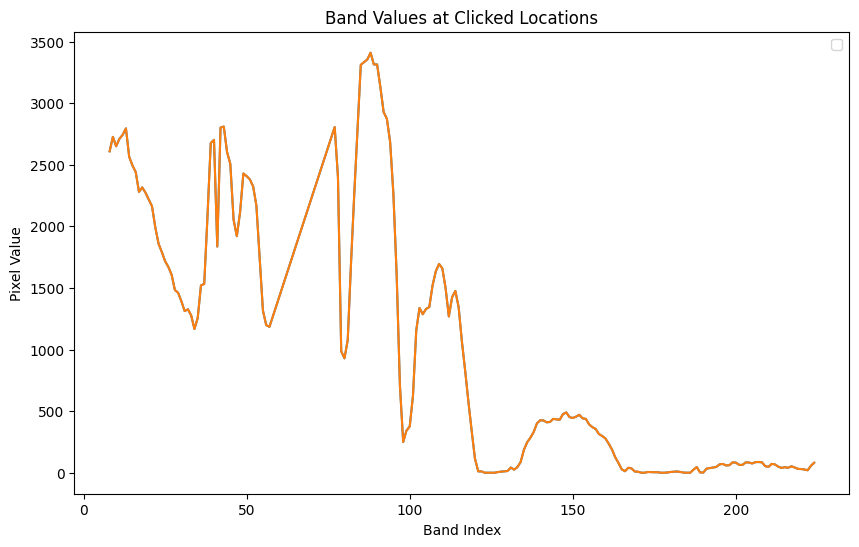

Clicked coordinates: [28.925920891522665, 78.94831578864299]


Band values: [2732, 2720, 2605, 2712, 2747, 2784, 2556, 2506, 2439, 2272, 2331, 2254, 2206, 2139, 1981, 1848, 1809, 1725, 1710, 1624, 1525, 1477, 1438, 1338, 1354, 1303, 1191, 1261, 1448, 1423, 1879, 2352, 2349, 1599, 2437, 2451, 2257, 2174, 1794, 1659, 1852, 2079, 2090, 2067, 1973, 1863, 1481, 1175, 1043, 1015, 2400, 2162, 812, 736, 990, 1555, 2118, 2611, 2976, 2994, 2999, 3012, 2936, 2939, 2774, 2627, 2571, 2369, 2013, 1457, 617, 206, 307, 328, 564, 1007, 1178, 1165, 1198, 1208, 1306, 1395, 1460, 1427, 1310, 1120, 1263, 1276, 1145, 917, 717, 493, 304, 114, 10, 6, 1, 1, 1, 1, 4, 6, 3, 5, 17, 10, 32, 72, 166, 217, 256, 300, 355, 373, 376, 348, 356, 387, 383, 389, 407, 420, 401, 397, 416, 144, 535, 374, 346, 324, 305, 272, 239, 231, 206, 164, 111, 75, 34, 15, 29, 29, 9, 6, 4, 4, 5, 6, 5, 7, 2, 1, 3, 6, 5, 8, 11, 5, 1, 1, 26, 39, 19, 6, 21, 36, 26, 28, 64, 65, 29, 32, 84, 83, 40, 41, 77, 73, 63, 64, 78, 75, 32, 31, 56, 57, 41, 35, 41, 39, 45, 42, 40, 49, 28, 28, 53, 70]


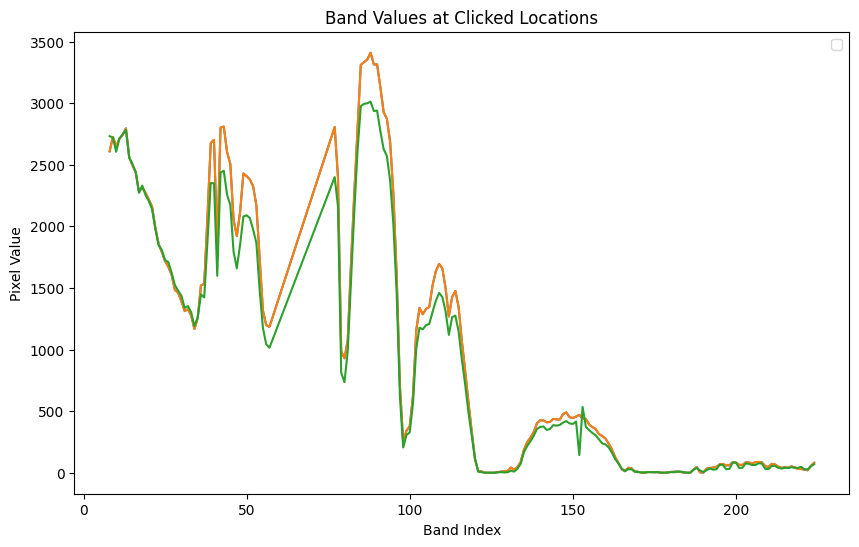

Clicked coordinates: [28.925949062624888, 78.94861074338549]


Band values: [2732, 2720, 2605, 2712, 2747, 2784, 2556, 2506, 2439, 2272, 2331, 2254, 2206, 2139, 1981, 1848, 1809, 1725, 1710, 1624, 1525, 1477, 1438, 1338, 1354, 1303, 1191, 1261, 1448, 1423, 1879, 2352, 2349, 1599, 2437, 2451, 2257, 2174, 1794, 1659, 1852, 2079, 2090, 2067, 1973, 1863, 1481, 1175, 1043, 1015, 2400, 2162, 812, 736, 990, 1555, 2118, 2611, 2976, 2994, 2999, 3012, 2936, 2939, 2774, 2627, 2571, 2369, 2013, 1457, 617, 206, 307, 328, 564, 1007, 1178, 1165, 1198, 1208, 1306, 1395, 1460, 1427, 1310, 1120, 1263, 1276, 1145, 917, 717, 493, 304, 114, 10, 6, 1, 1, 1, 1, 4, 6, 3, 5, 17, 10, 32, 72, 166, 217, 256, 300, 355, 373, 376, 348, 356, 387, 383, 389, 407, 420, 401, 397, 416, 144, 535, 374, 346, 324, 305, 272, 239, 231, 206, 164, 111, 75, 34, 15, 29, 29, 9, 6, 4, 4, 5, 6, 5, 7, 2, 1, 3, 6, 5, 8, 11, 5, 1, 1, 26, 39, 19, 6, 21, 36, 26, 28, 64, 65, 29, 32, 84, 83, 40, 41, 77, 73, 63, 64, 78, 75, 32, 31, 56, 57, 41, 35, 41, 39, 45, 42, 40, 49, 28, 28, 53, 70]


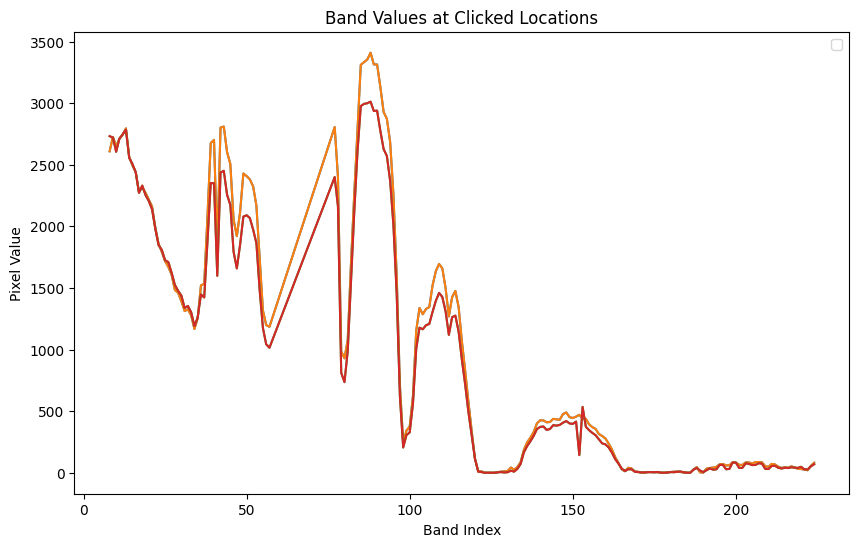

Clicked coordinates: [28.92563448488235, 78.94773660478499]


Band values: [2748, 2685, 2664, 2692, 2721, 2771, 2544, 2490, 2416, 2264, 2283, 2245, 2202, 2133, 1960, 1861, 1793, 1720, 1698, 1601, 1512, 1479, 1421, 1336, 1337, 1294, 1173, 1257, 1448, 1398, 1823, 2285, 2264, 1543, 2336, 2350, 2180, 2098, 1716, 1596, 1766, 2003, 1996, 1968, 1921, 1782, 1445, 1106, 991, 938, 1866, 1737, 797, 671, 893, 1322, 1664, 2063, 2473, 2472, 2455, 2477, 2426, 2406, 2316, 2163, 2035, 1892, 1629, 1154, 539, 205, 253, 280, 470, 825, 970, 931, 998, 981, 1043, 1116, 1184, 1172, 1057, 904, 997, 1038, 923, 748, 583, 403, 245, 86, 17, 12, 1, 1, 1, 1, 7, 14, 3, 7, 31, 18, 32, 71, 186, 238, 260, 298, 320, 338, 323, 306, 322, 345, 341, 332, 348, 356, 341, 346, 339, 270, 348, 302, 287, 273, 245, 225, 214, 201, 174, 138, 100, 69, 24, 7, 47, 47, 1, 1, 8, 8, 14, 16, 6, 8, 1, 1, 3, 4, 2, 7, 2, 1, 1, 1, 36, 57, 9, 1, 29, 40, 32, 36, 52, 53, 42, 46, 78, 75, 41, 37, 71, 70, 65, 71, 72, 68, 48, 44, 48, 48, 53, 46, 45, 43, 41, 39, 35, 32, 17, 8, 3, 11]


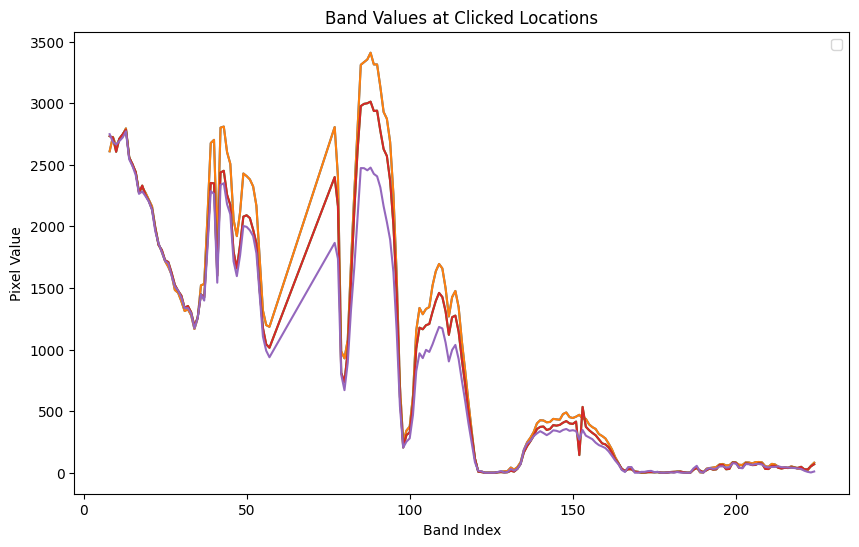

Clicked coordinates: [28.92562039928947, 78.94805301078148]


Band values: [2748, 2685, 2664, 2692, 2721, 2771, 2544, 2490, 2416, 2264, 2283, 2245, 2202, 2133, 1960, 1861, 1793, 1720, 1698, 1601, 1512, 1479, 1421, 1336, 1337, 1294, 1173, 1257, 1448, 1398, 1823, 2285, 2264, 1543, 2336, 2350, 2180, 2098, 1716, 1596, 1766, 2003, 1996, 1968, 1921, 1782, 1445, 1106, 991, 938, 1866, 1737, 797, 671, 893, 1322, 1664, 2063, 2473, 2472, 2455, 2477, 2426, 2406, 2316, 2163, 2035, 1892, 1629, 1154, 539, 205, 253, 280, 470, 825, 970, 931, 998, 981, 1043, 1116, 1184, 1172, 1057, 904, 997, 1038, 923, 748, 583, 403, 245, 86, 17, 12, 1, 1, 1, 1, 7, 14, 3, 7, 31, 18, 32, 71, 186, 238, 260, 298, 320, 338, 323, 306, 322, 345, 341, 332, 348, 356, 341, 346, 339, 270, 348, 302, 287, 273, 245, 225, 214, 201, 174, 138, 100, 69, 24, 7, 47, 47, 1, 1, 8, 8, 14, 16, 6, 8, 1, 1, 3, 4, 2, 7, 2, 1, 1, 1, 36, 57, 9, 1, 29, 40, 32, 36, 52, 53, 42, 46, 78, 75, 41, 37, 71, 70, 65, 71, 72, 68, 48, 44, 48, 48, 53, 46, 45, 43, 41, 39, 35, 32, 17, 8, 3, 11]


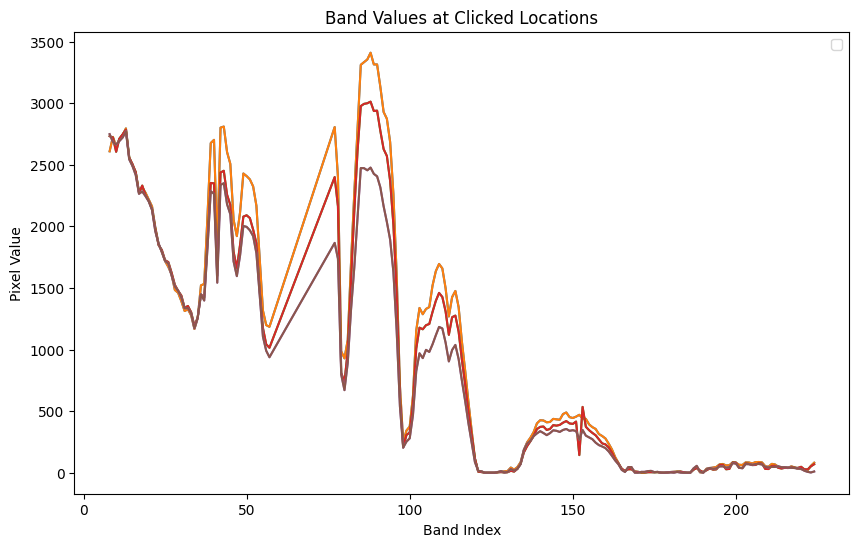

Clicked coordinates: [28.925653265669894, 78.94832651426998]


Band values: [2732, 2720, 2605, 2712, 2747, 2784, 2556, 2506, 2439, 2272, 2331, 2254, 2206, 2139, 1981, 1848, 1809, 1725, 1710, 1624, 1525, 1477, 1438, 1338, 1354, 1303, 1191, 1261, 1448, 1423, 1879, 2352, 2349, 1599, 2437, 2451, 2257, 2174, 1794, 1659, 1852, 2079, 2090, 2067, 1973, 1863, 1481, 1175, 1043, 1015, 2400, 2162, 812, 736, 990, 1555, 2118, 2611, 2976, 2994, 2999, 3012, 2936, 2939, 2774, 2627, 2571, 2369, 2013, 1457, 617, 206, 307, 328, 564, 1007, 1178, 1165, 1198, 1208, 1306, 1395, 1460, 1427, 1310, 1120, 1263, 1276, 1145, 917, 717, 493, 304, 114, 10, 6, 1, 1, 1, 1, 4, 6, 3, 5, 17, 10, 32, 72, 166, 217, 256, 300, 355, 373, 376, 348, 356, 387, 383, 389, 407, 420, 401, 397, 416, 144, 535, 374, 346, 324, 305, 272, 239, 231, 206, 164, 111, 75, 34, 15, 29, 29, 9, 6, 4, 4, 5, 6, 5, 7, 2, 1, 3, 6, 5, 8, 11, 5, 1, 1, 26, 39, 19, 6, 21, 36, 26, 28, 64, 65, 29, 32, 84, 83, 40, 41, 77, 73, 63, 64, 78, 75, 32, 31, 56, 57, 41, 35, 41, 39, 45, 42, 40, 49, 28, 28, 53, 70]


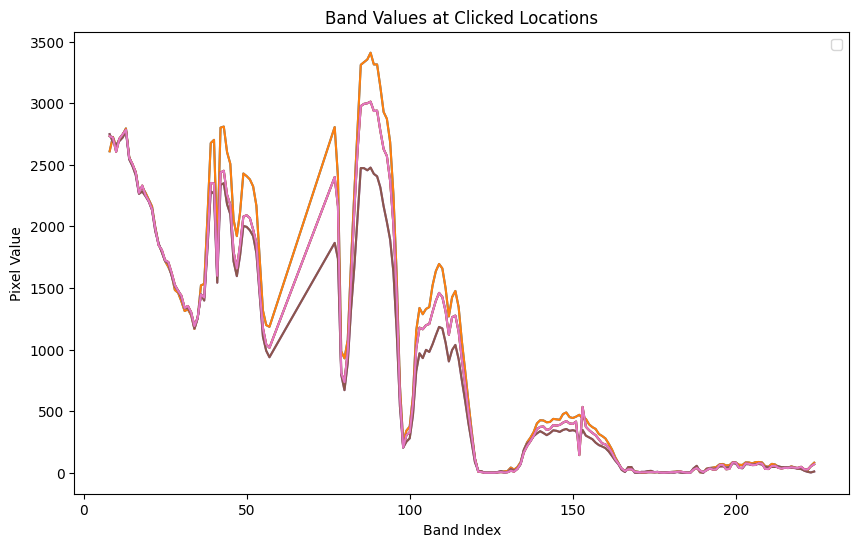

Clicked coordinates: [28.925676741649536, 78.9486429202665]


Band values: [2732, 2720, 2605, 2712, 2747, 2784, 2556, 2506, 2439, 2272, 2331, 2254, 2206, 2139, 1981, 1848, 1809, 1725, 1710, 1624, 1525, 1477, 1438, 1338, 1354, 1303, 1191, 1261, 1448, 1423, 1879, 2352, 2349, 1599, 2437, 2451, 2257, 2174, 1794, 1659, 1852, 2079, 2090, 2067, 1973, 1863, 1481, 1175, 1043, 1015, 2400, 2162, 812, 736, 990, 1555, 2118, 2611, 2976, 2994, 2999, 3012, 2936, 2939, 2774, 2627, 2571, 2369, 2013, 1457, 617, 206, 307, 328, 564, 1007, 1178, 1165, 1198, 1208, 1306, 1395, 1460, 1427, 1310, 1120, 1263, 1276, 1145, 917, 717, 493, 304, 114, 10, 6, 1, 1, 1, 1, 4, 6, 3, 5, 17, 10, 32, 72, 166, 217, 256, 300, 355, 373, 376, 348, 356, 387, 383, 389, 407, 420, 401, 397, 416, 144, 535, 374, 346, 324, 305, 272, 239, 231, 206, 164, 111, 75, 34, 15, 29, 29, 9, 6, 4, 4, 5, 6, 5, 7, 2, 1, 3, 6, 5, 8, 11, 5, 1, 1, 26, 39, 19, 6, 21, 36, 26, 28, 64, 65, 29, 32, 84, 83, 40, 41, 77, 73, 63, 64, 78, 75, 32, 31, 56, 57, 41, 35, 41, 39, 45, 42, 40, 49, 28, 28, 53, 70]


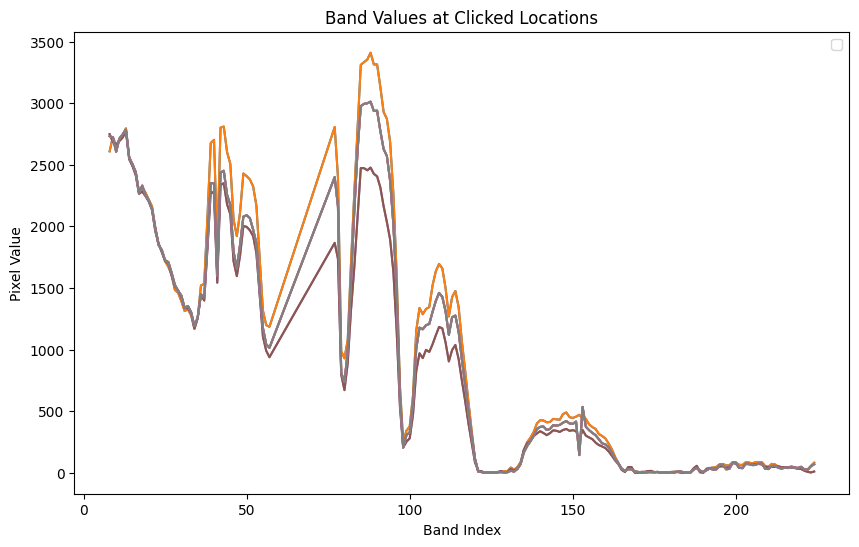

In [ ]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize()

# Define the coordinates
latitude = 28.934799
longitude = 78.948349

# Create a point geometry
point = ee.Geometry.Point([longitude, latitude])

# Load Hyperion imagery
hyperion = ee.ImageCollection("EO1/HYPERION") \
    .filterBounds(point) \
    .filterDate('2010-02-12', '2010-02-13') \
    .first()

# Create a Map object
Map = geemap.Map(center=[latitude, longitude], zoom=12)

# Add the Hyperion imagery to the map
Map.addLayer(hyperion, {'bands': ['B050', 'B023', 'B015'], 'min': 1000, 'max': 14000, 'gamma': 2.5}, 'Hyperion')

# Add a marker for the selected point
Map.addLayer(point, {'color': 'red'}, 'Selected Point')

# Define a function to get band values at a point
def get_value(coords):
    value = hyperion.sample(coords, 100).first()
    return value

all_band_values = []

# Define a callback function to handle map clicks
def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        lonlat = kwargs.get('coordinates')
        point = ee.Geometry.Point(lonlat[1], lonlat[0])
        band_values = get_value(point)
        print("Clicked coordinates:", lonlat)
        band_values_list = list(band_values.getInfo()['properties'].values())
        band_values_keys = [int(key[1:]) for key in band_values.getInfo()['properties'].keys()]
        all_band_values.append(band_values_list)
        print("Band values:", band_values_list)

        # Plot all clicked points on the same graph
        plt.figure(figsize=(10, 6))
        for values in all_band_values:
            plt.plot(band_values_keys, values)
        plt.xlabel('Band Index')
        plt.ylabel('Pixel Value')
        plt.title('Band Values at Clicked Locations')
        plt.legend()
        plt.show()

        # Add a marker at the clicked location
        marker = ee.Feature(point, {'marker_color': 'blue'})
        Map.addLayer(marker, {}, 'Clicked Point')

# Add the click event handler to the map
Map.on_interaction(handle_click)

# Display the map
Map


In [ ]:
point = ee.Geometry.Point([78.94734218955271, 28.951677350293465])

In [10]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize()

# Define the coordinates

latitude = 11.09548
longitude = 76.51647

# Create a point geometry
point = ee.Geometry.Point([longitude, latitude])

# Load Hyperion imagery
hyperion = ee.ImageCollection("EO1/HYPERION") \
    .filterBounds(point) \
    .filterDate('2010-01-30', '2010-02-01') \
    .first()

# Create a Map object
Map = geemap.Map(center=[latitude, longitude], zoom=12)

# Add the Hyperion imagery to the map
Map.addLayer(hyperion, {'bands': ['B050', 'B023', 'B015'], 'min': 1000, 'max': 14000, 'gamma': 2.5}, 'Hyperion')

# Add a marker for the selected point
Map.addLayer(point, {'color': 'red'}, 'Selected Point')

points = []


# Define a function to get band values at a point
def get_value(coords):
    value = hyperion.sample(coords, 30).first()
    return value


def more_value():
    best_band_value = np.linspace(0, -100000, num = 40)
    for i in range(1, 100, 2):
        print(i)
        for j in range(1, 2, 2):
            point = ee.Geometry.Point(longitude + (i / 10000), latitude + (j / 10000))
            band_values = get_value(point)
            points.append(point)
            if(band_values.getInfo() == None):
                continue
            band_values_list = list(band_values.getInfo()['properties'].values())
            band_values_keys = [int(key[1:]) for key in band_values.getInfo()['properties'].keys()]
            if (band_values_list[20] - band_values_list[0] > best_band_value[20] - best_band_value[0]):
                best_band_value = band_values_list
    return best_band_value

all_band_values = []

# Define a callback function to handle map clicks
def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        lonlat = kwargs.get('coordinates')
        point = ee.Geometry.Point(lonlat[1], lonlat[0])
        band_values = get_value(point)
        print("Clicked coordinates:", lonlat)
        band_values_list = list(band_values.getInfo()['properties'].values())
        band_values_keys = [int(key[1:]) for key in band_values.getInfo()['properties'].keys()]
        all_band_values.append(band_values_list)
        print("Band values:", band_values_list)

        # Plot all clicked points on the same graph
        plt.figure(figsize=(10, 6))
        for values in all_band_values:
            plt.plot(band_values_keys, values)
        plt.xlabel('Band Index')
        plt.ylabel('Pixel Value')
        plt.title('Band Values at Clicked Locations')
        plt.legend()
        plt.show()

        # Add a marker at the clicked location
        marker = ee.Feature(point, {'marker_color': 'blue'})
        Map.addLayer(marker, {}, 'Clicked Point')

# Add the click event handler to the map
Map.on_interaction(handle_click)

# Display the map
Map


Map(center=[11.09548, 76.51647], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

Clicked coordinates: [11.977573533681289, 76.69145386157419]


TypeError: 'NoneType' object is not subscriptable

In [13]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize()

# Define the coordinates

latitude = 11.09548
longitude = 76.51647

# Create a point geometry
point = ee.Geometry.Point([longitude, latitude])

# Load Hyperion imagery
hyperion = ee.ImageCollection("EO1/HYPERION") \
    .filterBounds(point) \
    .filterDate('2010-01-30', '2010-02-01') \
    .first()

# Create a Map object
Map = geemap.Map(center=[latitude, longitude], zoom=12)

# Add the Hyperion imagery to the map
Map.addLayer(hyperion, {'bands': ['B050', 'B023', 'B015'], 'min': 1000, 'max': 14000, 'gamma': 2.5}, 'Hyperion')

# Add a marker for the selected point
Map.addLayer(point, {'color': 'red'}, 'Selected Point')

# Define a function to get band values at a point
def get_value(coords):
    value = hyperion.sample(coords, 100).first()
    return value

all_band_values = []

# Define a callback function to handle map clicks
def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        lonlat = kwargs.get('coordinates')
        point = ee.Geometry.Point(lonlat[1], lonlat[0])
        band_values = get_value(point)
        print("Clicked coordinates:", lonlat)
        band_values_list = list(band_values.getInfo()['properties'].values())
        band_values_keys = [int(key[1:]) for key in band_values.getInfo()['properties'].keys()]
        all_band_values.append(band_values_list)
        print("Band values:", band_values_list)

        # Plot all clicked points on the same graph
        plt.figure(figsize=(10, 6))
        for values in all_band_values:
            plt.plot(band_values_keys, values)
        plt.xlabel('Band Index')
        plt.ylabel('Pixel Value')
        plt.title('Band Values at Clicked Locations')
        plt.legend()
        plt.show()

        # Add a marker at the clicked location
        marker = ee.Feature(point, {'marker_color': 'blue'})
        Map.addLayer(marker, {}, 'Clicked Point')

# Add the click event handler to the map
Map.on_interaction(handle_click)

# Display the map
Map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
val = more_value()

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99


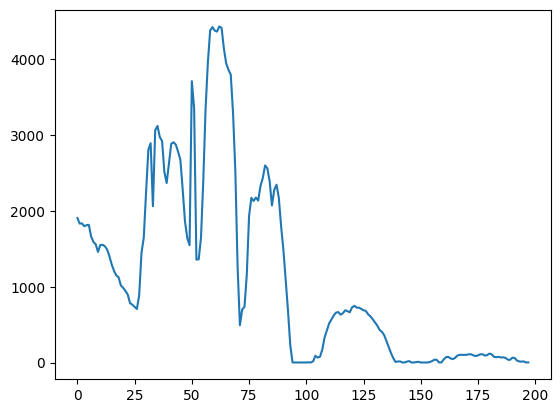

In [ ]:
plt.plot(val)

In [ ]:
hyperion.sample(points[0], 30)

Map(center=[27.13, 70.1], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI…

Clicked coordinates: [27.15539307250557, 70.10780870031094]


Band values: [3900, 3812, 3887, 4051, 4204, 4463, 4238, 4327, 4499, 4386, 4644, 4735, 4866, 5015, 5002, 5037, 5164, 5119, 5341, 5222, 5052, 5116, 5055, 4825, 5072, 5019, 4562, 4494, 4230, 3511, 3933, 4425, 4226, 2878, 4232, 4241, 3987, 3850, 3207, 2998, 3252, 3644, 3678, 3612, 3521, 3379, 2784, 2232, 2011, 2075, 4747, 3966, 1841, 1912, 2009, 3275, 4122, 5077, 5549, 5528, 5582, 5493, 5164, 5040, 4874, 4726, 4595, 4307, 3577, 2518, 897, 380, 656, 663, 1357, 2410, 2777, 2829, 2876, 2945, 3148, 3445, 3551, 3501, 3224, 2836, 3104, 3139, 2805, 2311, 1898, 1276, 838, 206, 2, 1, 31, 24, 7, 10, 36, 68, 33, 138, 354, 250, 375, 771, 1357, 1719, 1960, 2155, 2269, 2311, 2301, 2079, 2041, 2115, 2034, 2008, 2108, 2068, 1974, 1978, 1918, 1860, 1863, 1781, 1695, 1605, 1525, 1396, 1261, 1206, 1054, 790, 519, 283, 75, 7, 7, 6, 27, 26, 11, 8, 1, 1, 9, 10, 2, 2, 18, 35, 121, 322, 480, 401, 116, 161, 450, 728, 660, 461, 495, 615, 743, 791, 772, 769, 779, 800, 779, 720, 677, 675, 640, 609, 611, 640, 627, 601

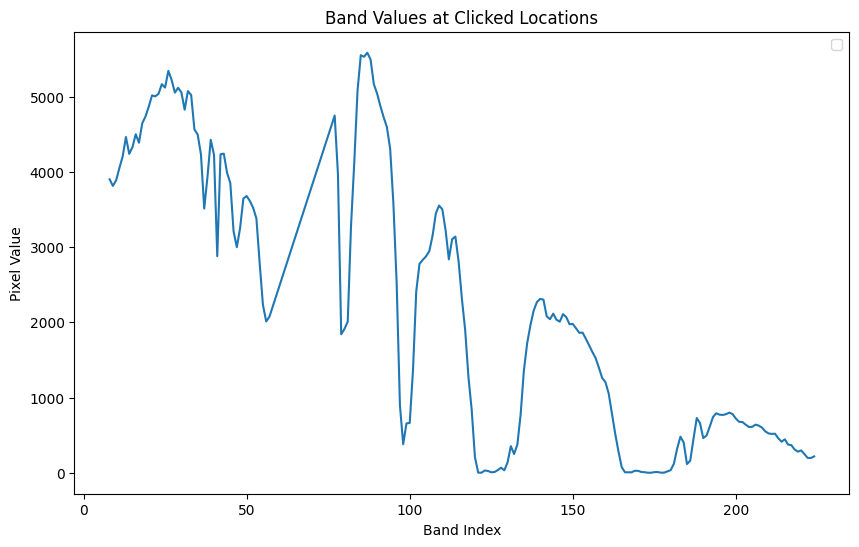

In [12]:
import ee
import geemap
import matplotlib.pyplot as plt

# Initialize Earth Engine
ee.Initialize()

# Define the coordinates

latitude = 27.13
longitude = 70.10

# Create a point geometry
point = ee.Geometry.Point([longitude, latitude])

# Load Hyperion imagery
hyperion = ee.ImageCollection("EO1/HYPERION") \
    .filterBounds(point) \
    .filterDate('2000-12-10', '2013-12-11') \
    .first()

# Create a Map object
Map = geemap.Map(center=[latitude, longitude], zoom=12)

# Add the Hyperion imagery to the map
Map.addLayer(hyperion, {'bands': ['B050', 'B023', 'B015'], 'min': 1000, 'max': 14000, 'gamma': 2.5}, 'Hyperion')

# Add a marker for the selected point
Map.addLayer(point, {'color': 'red'}, 'Selected Point')

# Define a function to get band values at a point
def get_value(coords):
    value = hyperion.sample(coords, 100).first()
    return value

all_band_values = []

# Define a callback function to handle map clicks
def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        lonlat = kwargs.get('coordinates')
        point = ee.Geometry.Point(lonlat[1], lonlat[0])
        band_values = get_value(point)
        print("Clicked coordinates:", lonlat)
        band_values_list = list(band_values.getInfo()['properties'].values())
        band_values_keys = [int(key[1:]) for key in band_values.getInfo()['properties'].keys()]
        all_band_values.append(band_values_list)
        print("Band values:", band_values_list)

        # Plot all clicked points on the same graph
        plt.figure(figsize=(10, 6))
        for values in all_band_values:
            plt.plot(band_values_keys, values)
        plt.xlabel('Band Index')
        plt.ylabel('Pixel Value')
        plt.title('Band Values at Clicked Locations')
        plt.legend()
        plt.show()

        # Add a marker at the clicked location
        marker = ee.Feature(point, {'marker_color': 'blue'})
        Map.addLayer(marker, {}, 'Clicked Point')

# Add the click event handler to the map
Map.on_interaction(handle_click)

# Display the map
Map


Map(center=[28.934799, 78.948349], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Sear…

Clicked coordinates: [28.938758608666443, 78.93477116313605]
Band values: [2678, 2684, 2642, 2668, 2703, 2767, 2523, 2464, 2422, 2257, 2326, 2257, 2209, 2150, 1973, 1846, 1783, 1677, 1679, 1582, 1469, 1451, 1387, 1282, 1294, 1251, 1137, 1248, 1539, 1577, 2155, 2757, 2725, 1892, 2895, 2870, 2690, 2584, 2106, 1994, 2217, 2514, 2547, 2528, 2427, 2295, 1828, 1393, 1293, 1307, 2617, 2470, 1044, 938, 977, 1618, 2337, 2927, 3498, 3528, 3586, 3572, 3600, 3523, 3329, 3184, 3125, 2934, 2397, 1714, 764, 252, 326, 370, 609, 1155, 1341, 1329, 1386, 1373, 1536, 1674, 1750, 1731, 1613, 1354, 1502, 1561, 1380, 1098, 834, 565, 345, 132, 24, 21, 1, 1, 1, 1, 23, 30, 1, 8, 3, 1, 39, 88, 187, 252, 281, 328, 402, 425, 451, 430, 398, 427, 432, 433, 482, 480, 461, 444, 447, 434, 440, 422, 407, 370, 354, 322, 272, 251, 242, 187, 125, 79, 20, 7, 7, 8, 13, 14, 6, 5, 1, 2, 15, 13, 6, 5, 1, 1, 6, 17, 11, 7, 1, 1, 14, 32, 37, 24, 37, 47, 49, 50, 58, 56, 55, 61, 70, 61, 59, 54, 74, 73, 60, 61, 84, 81, 61, 53, 52, 52

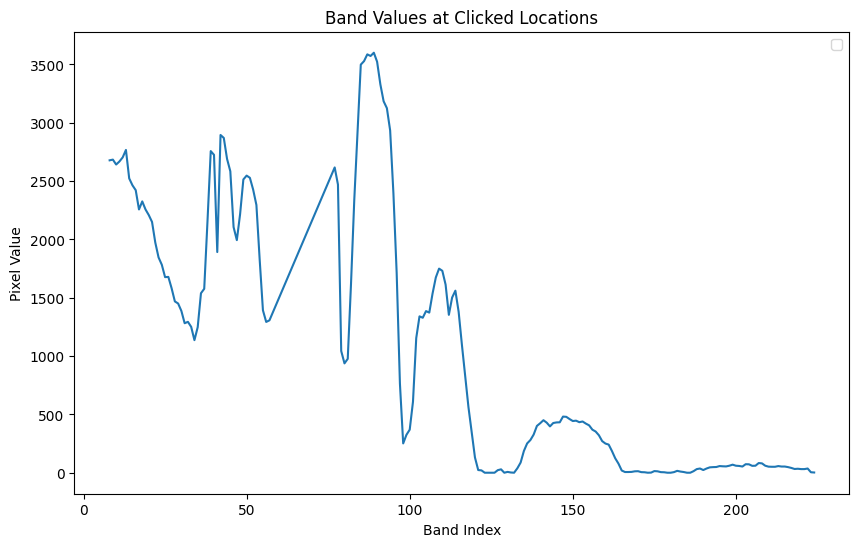

Clicked coordinates: [28.86512110454975, 78.91072923658818]


Band values: [2841, 2811, 2743, 2773, 2770, 2833, 2592, 2523, 2497, 2334, 2387, 2363, 2312, 2244, 2064, 1916, 1851, 1758, 1734, 1629, 1523, 1496, 1434, 1326, 1334, 1299, 1173, 1298, 1649, 1728, 2432, 3202, 3232, 2240, 3436, 3428, 3195, 3077, 2514, 2343, 2636, 2994, 3009, 2976, 2890, 2725, 2157, 1666, 1499, 1484, 3422, 3201, 1203, 1045, 1271, 2032, 2864, 3579, 4158, 4146, 4277, 4309, 4267, 4236, 4111, 3940, 3640, 3437, 2954, 2113, 921, 291, 424, 454, 758, 1401, 1627, 1603, 1701, 1682, 1843, 2021, 2143, 2132, 1929, 1628, 1811, 1888, 1686, 1336, 994, 661, 402, 146, 37, 31, 8, 5, 1, 2, 1, 3, 7, 17, 3, 1, 48, 102, 198, 266, 324, 382, 446, 487, 514, 492, 499, 545, 543, 550, 576, 594, 557, 555, 556, 549, 547, 528, 507, 472, 423, 381, 347, 325, 270, 207, 136, 86, 30, 4, 27, 23, 8, 10, 2, 2, 1, 2, 3, 4, 1, 1, 2, 3, 1, 2, 4, 1, 1, 1, 27, 49, 25, 11, 44, 60, 53, 55, 68, 74, 63, 65, 85, 80, 63, 58, 89, 86, 72, 78, 89, 84, 69, 65, 66, 63, 51, 41, 51, 41, 43, 37, 9, 5, 28, 23, 19, 20]


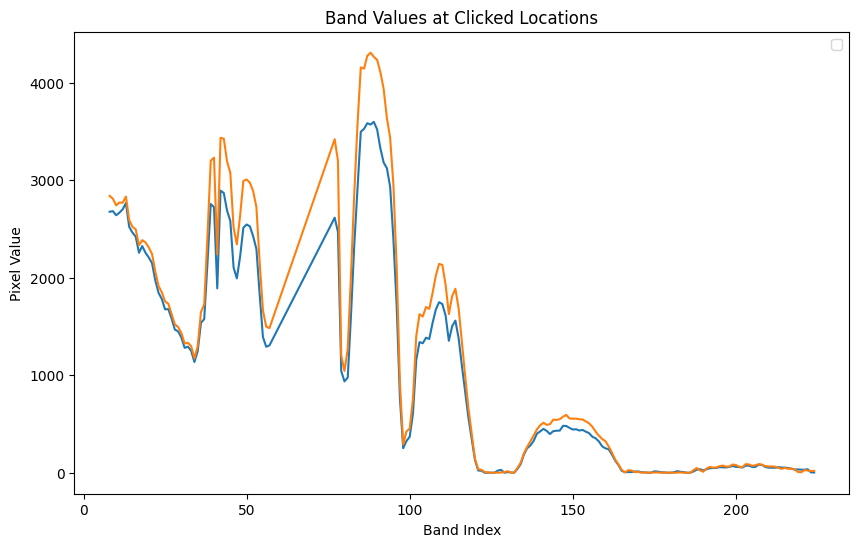

Clicked coordinates: [28.98171470422955, 78.92343708055388]


Band values: [2755, 2707, 2674, 2722, 2744, 2799, 2575, 2491, 2424, 2275, 2318, 2246, 2205, 2118, 1959, 1825, 1776, 1674, 1681, 1575, 1482, 1453, 1386, 1285, 1302, 1256, 1141, 1215, 1436, 1426, 1927, 2499, 2568, 1738, 2664, 2671, 2483, 2409, 1988, 1829, 2028, 2339, 2331, 2313, 2256, 2125, 1627, 1218, 1075, 968, 2487, 2491, 930, 852, 956, 1551, 2227, 2740, 3226, 3189, 3266, 3244, 3191, 3229, 3131, 2972, 2907, 2720, 2278, 1636, 708, 219, 295, 334, 559, 1051, 1262, 1238, 1307, 1290, 1448, 1570, 1670, 1651, 1544, 1281, 1387, 1450, 1294, 1049, 773, 519, 315, 122, 27, 13, 12, 12, 1, 1, 6, 9, 3, 9, 24, 9, 36, 84, 181, 248, 294, 346, 405, 424, 427, 407, 399, 428, 429, 428, 475, 478, 448, 440, 457, 443, 428, 419, 386, 361, 339, 306, 272, 259, 220, 175, 115, 71, 29, 11, 21, 20, 10, 7, 11, 13, 1, 1, 9, 9, 8, 10, 6, 6, 14, 25, 13, 14, 1, 1, 36, 57, 30, 15, 33, 46, 57, 65, 67, 67, 61, 70, 89, 80, 72, 73, 75, 77, 60, 67, 81, 76, 66, 61, 59, 56, 52, 41, 34, 32, 45, 41, 34, 42, 23, 22, 24, 40]


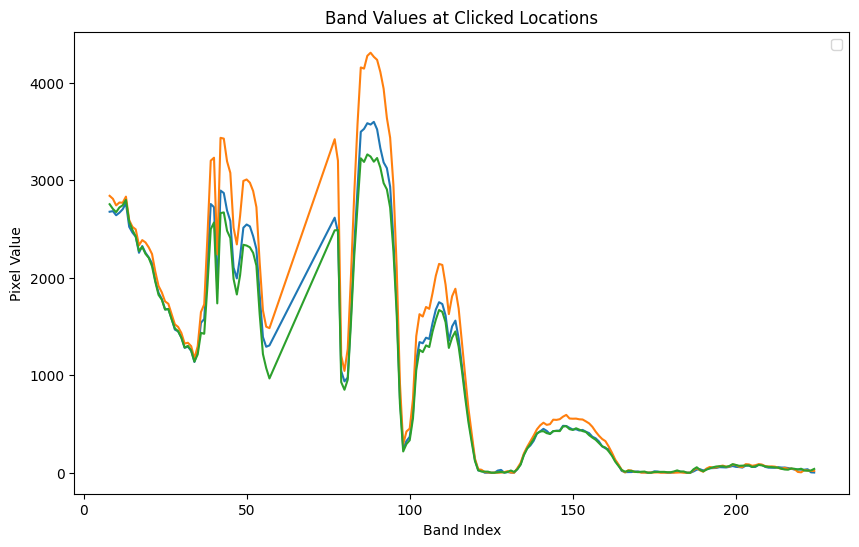

Clicked coordinates: [29.08107611660672, 78.98079410602087]


Band values: [2830, 2736, 2702, 2741, 2734, 2806, 2543, 2499, 2446, 2274, 2345, 2289, 2238, 2160, 1986, 1874, 1796, 1705, 1676, 1566, 1478, 1445, 1393, 1286, 1279, 1241, 1127, 1236, 1546, 1587, 2229, 2906, 2940, 2011, 3124, 3117, 2912, 2808, 2290, 2146, 2394, 2715, 2753, 2739, 2648, 2489, 1983, 1511, 1347, 1387, 3135, 2773, 1319, 1160, 1084, 1746, 2476, 3097, 3682, 3667, 3636, 3686, 3749, 3702, 3487, 3358, 3288, 3059, 2525, 1795, 765, 243, 334, 361, 653, 1178, 1446, 1402, 1357, 1376, 1588, 1720, 1808, 1794, 1621, 1356, 1541, 1598, 1403, 1113, 846, 570, 336, 113, 11, 12, 11, 15, 1, 1, 2, 7, 28, 43, 47, 34, 55, 93, 147, 201, 260, 310, 383, 414, 410, 386, 363, 405, 418, 430, 452, 465, 445, 442, 447, 429, 431, 416, 406, 376, 350, 317, 281, 262, 222, 168, 121, 76, 25, 10, 17, 23, 13, 12, 12, 15, 8, 10, 15, 17, 2, 2, 1, 1, 4, 5, 12, 7, 1, 1, 15, 38, 8, 1, 35, 48, 31, 28, 59, 60, 50, 48, 68, 74, 62, 63, 69, 69, 58, 63, 78, 75, 53, 43, 51, 47, 62, 59, 48, 46, 41, 38, 28, 26, 41, 52, 27, 20]


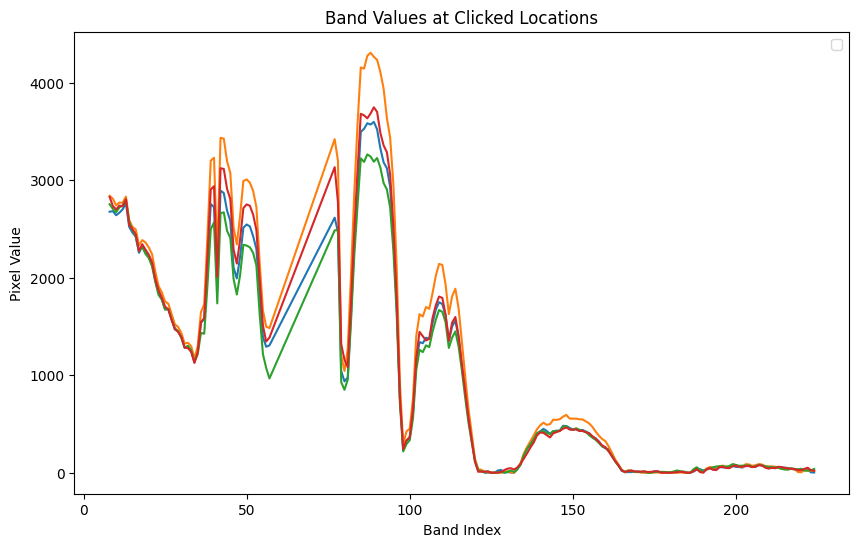

Clicked coordinates: [29.094277075386845, 78.98010719553623]


Band values: [2690, 2718, 2693, 2707, 2713, 2792, 2538, 2466, 2404, 2243, 2266, 2211, 2153, 2065, 1921, 1787, 1755, 1660, 1634, 1542, 1438, 1400, 1363, 1271, 1277, 1248, 1111, 1177, 1314, 1284, 1688, 2117, 2087, 1428, 2188, 2187, 2010, 1942, 1581, 1473, 1639, 1842, 1848, 1817, 1762, 1625, 1306, 985, 949, 957, 1906, 1758, 833, 742, 817, 1195, 1704, 2084, 2273, 2289, 2332, 2328, 2339, 2307, 2264, 2150, 1965, 1811, 1556, 1093, 485, 184, 262, 286, 425, 741, 893, 865, 876, 851, 908, 974, 1050, 1039, 947, 818, 915, 948, 851, 679, 493, 343, 242, 108, 11, 5, 6, 6, 1, 1, 8, 13, 1, 5, 37, 31, 57, 80, 142, 178, 197, 224, 255, 269, 279, 259, 250, 268, 270, 268, 290, 292, 268, 269, 290, 283, 260, 252, 243, 237, 218, 196, 169, 160, 139, 111, 69, 47, 28, 22, 6, 5, 9, 10, 6, 11, 1, 1, 8, 8, 5, 9, 4, 4, 8, 13, 33, 27, 1, 1, 17, 34, 18, 8, 20, 27, 9, 12, 33, 33, 24, 27, 51, 49, 26, 30, 57, 57, 42, 41, 43, 43, 36, 32, 39, 39, 29, 25, 27, 23, 29, 28, 27, 26, 28, 23, 26, 49]


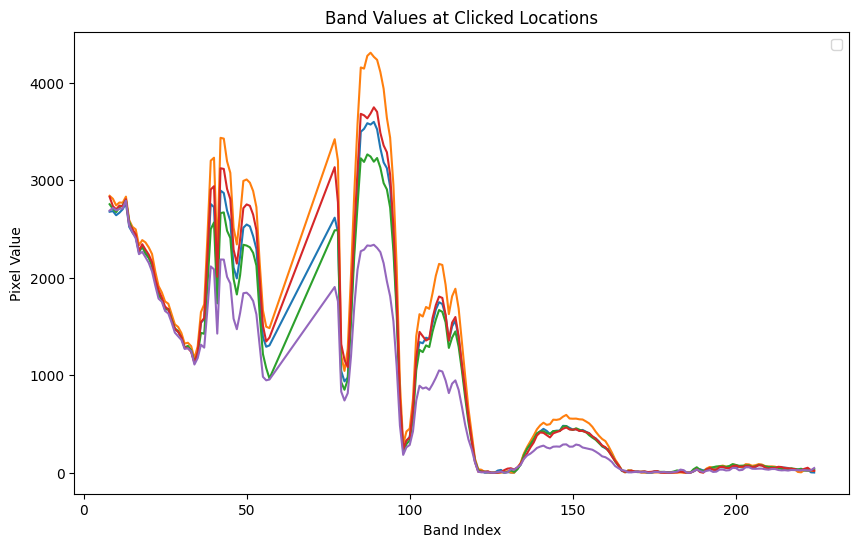

Clicked coordinates: [29.090376968221005, 78.99178467377502]


Band values: [2648, 2642, 2549, 2610, 2640, 2710, 2468, 2392, 2361, 2212, 2280, 2236, 2190, 2136, 1981, 1833, 1748, 1683, 1645, 1565, 1447, 1418, 1376, 1277, 1280, 1240, 1140, 1223, 1601, 1643, 2296, 3050, 3145, 2124, 3317, 3362, 3118, 3028, 2500, 2310, 2584, 2968, 2995, 2973, 2881, 2720, 2164, 1694, 1646, 1508, 3635, 3117, 1334, 1162, 1250, 2085, 2890, 3595, 4143, 4157, 4236, 4350, 4312, 4335, 4164, 4017, 3771, 3519, 2944, 2058, 871, 280, 419, 436, 749, 1403, 1655, 1627, 1673, 1689, 1863, 2018, 2098, 2131, 1939, 1601, 1806, 1884, 1669, 1336, 1025, 677, 408, 142, 5, 1, 1, 1, 1, 1, 1, 4, 4, 10, 17, 4, 29, 82, 210, 283, 336, 382, 459, 507, 538, 510, 495, 566, 538, 541, 594, 607, 557, 552, 572, 564, 561, 543, 502, 468, 444, 398, 351, 327, 277, 209, 143, 92, 34, 14, 18, 21, 12, 12, 28, 23, 1, 1, 11, 12, 3, 4, 8, 4, 1, 2, 2, 1, 1, 1, 26, 50, 24, 7, 45, 55, 54, 60, 69, 71, 67, 77, 108, 100, 73, 75, 85, 87, 76, 80, 97, 97, 74, 63, 73, 71, 67, 55, 48, 40, 44, 42, 26, 22, 19, 23, 28, 26]


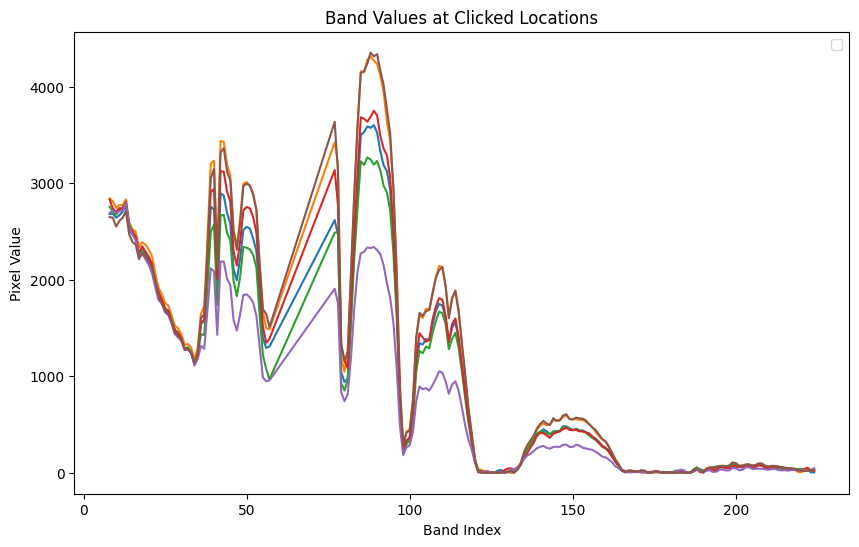

Clicked coordinates: [29.10147688512031, 78.96018679148183]


Band values: [3195, 3186, 3115, 3214, 3249, 3380, 3091, 3081, 3027, 2849, 2926, 2871, 2813, 2756, 2626, 2490, 2464, 2353, 2376, 2279, 2174, 2175, 2120, 2007, 2054, 2013, 1839, 1913, 2035, 1861, 2288, 2779, 2704, 1833, 2800, 2821, 2609, 2520, 2079, 1949, 2148, 2454, 2448, 2426, 2350, 2220, 1786, 1331, 1169, 1120, 2924, 2650, 1142, 1009, 1033, 1686, 2394, 3004, 3599, 3566, 3521, 3496, 3533, 3495, 3370, 3213, 3042, 2848, 2440, 1762, 845, 295, 415, 472, 764, 1399, 1606, 1597, 1676, 1638, 1800, 1936, 2023, 1992, 1868, 1561, 1723, 1814, 1658, 1337, 1056, 742, 413, 119, 1, 1, 1, 1, 1, 1, 6, 12, 29, 52, 91, 63, 83, 191, 408, 538, 643, 739, 811, 851, 870, 807, 800, 846, 812, 814, 880, 885, 844, 837, 827, 816, 785, 760, 736, 712, 654, 596, 545, 514, 462, 353, 250, 159, 65, 28, 15, 9, 23, 21, 1, 1, 1, 1, 2, 3, 1, 1, 6, 9, 1, 24, 71, 67, 2, 3, 79, 154, 134, 84, 112, 150, 176, 188, 225, 228, 220, 238, 249, 226, 191, 197, 221, 217, 187, 200, 203, 196, 176, 168, 166, 162, 151, 129, 144, 131, 115, 113

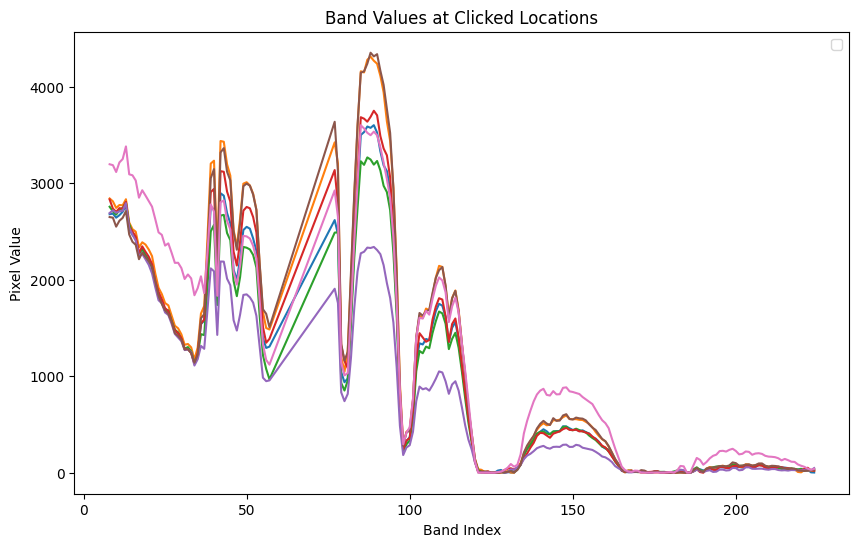

In [ ]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize()

# Define the coordinates
latitude = 28.934799
longitude = 78.948349

# Create a point geometry
point = ee.Geometry.Point([longitude, latitude])

# Load Hyperion imagery
hyperion = ee.ImageCollection("EO1/HYPERION") \
    .filterBounds(point) \
    .filterDate('2010-02-12', '2010-02-13') \
    .first()

# Create a Map object
Map = geemap.Map(center=[latitude, longitude], zoom=12)

# Add the Hyperion imagery to the map
Map.addLayer(hyperion, {'bands': ['B050', 'B023', 'B015'], 'min': 1000, 'max': 14000, 'gamma': 2.5}, 'Hyperion')

# Add a marker for the selected point
Map.addLayer(point, {'color': 'red'}, 'Selected Point')

# Define a function to get band values at a point
def get_value(coords):
    value = hyperion.sample(coords, 100).first()
    return value

all_band_values = []

# Define a callback function to handle map clicks
def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        lonlat = kwargs.get('coordinates')
        point = ee.Geometry.Point(lonlat[1], lonlat[0])
        band_values = get_value(point)
        print("Clicked coordinates:", lonlat)
        band_values_list = list(band_values.getInfo()['properties'].values())
        band_values_keys = [int(key[1:]) for key in band_values.getInfo()['properties'].keys()]
        all_band_values.append(band_values_list)
        print("Band values:", band_values_list)

        # Plot all clicked points on the same graph
        plt.figure(figsize=(10, 6))
        for values in all_band_values:
            plt.plot(band_values_keys, values)
        plt.xlabel('Band Index')
        plt.ylabel('Pixel Value')
        plt.title('Band Values at Clicked Locations')
        plt.legend()
        plt.show()

        # Add a marker at the clicked location
        marker = ee.Feature(point, {'marker_color': 'blue'})
        Map.addLayer(marker, {}, 'Clicked Point')

# Add the click event handler to the map
Map.on_interaction(handle_click)

# Display the map
Map


In [ ]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize()

# Define the coordinates
latitude = 49.008776
longitude = 8.402794

# Create a point geometry
point = ee.Geometry.Point([longitude, latitude])

# Load Hyperion imagery
hyperion = ee.ImageCollection("EO1/HYPERION") \
    .filterBounds(point) \
    .filterDate('2011-08-17', '2011-08-26') \
    .first()

# Create a Map object
Map = geemap.Map(center=[latitude, longitude], zoom=12)

# Add the Hyperion imagery to the map
Map.addLayer(hyperion, {'bands': ['B050', 'B023', 'B015'], 'min': 1000, 'max': 14000, 'gamma': 2.5}, 'Hyperion')

# Add a marker for the selected point
Map.addLayer(point, {'color': 'red'}, 'Selected Point')

# Define a function to get band values at a point
def get_value(coords):
    value = hyperion.sample(coords, 100).first()
    return value

all_band_values = []

# Define a callback function to handle map clicks
def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        lonlat = kwargs.get('coordinates')
        point = ee.Geometry.Point(lonlat[1], lonlat[0])
        band_values = get_value(point)
        print("Clicked coordinates:", lonlat)
        band_values_list = list(band_values.getInfo()['properties'].values())
        band_values_keys = [int(key[1:]) for key in band_values.getInfo()['properties'].keys()]
        all_band_values.append(band_values_list)
        print("Band values:", band_values_list)

        # Plot all clicked points on the same graph
        plt.figure(figsize=(10, 6))
        for values in all_band_values:
            plt.plot(band_values_keys, values)
        plt.xlabel('Band Index')
        plt.ylabel('Pixel Value')
        plt.title('Band Values at Clicked Locations')
        plt.legend()
        plt.show()

        # Add a marker at the clicked location
        marker = ee.Feature(point, {'marker_color': 'blue'})
        Map.addLayer(marker, {}, 'Clicked Point')

# Add the click event handler to the map
Map.on_interaction(handle_click)

# Display the map
Map


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import ee
import geemap
import matplotlib.pyplot as plt

# Initialize Earth Engine
ee.Initialize()

# Define the coordinates
latitude = 37.50
longitude = -99.514

# Create a point geometry
point = ee.Geometry.Point([longitude, latitude])

# Load Hyperion imagery
hyperion = ee.ImageCollection("EO1/HYPERION") \
    .filterBounds(point) \
    .filterDate('2007-08-08', '2007-08-09') \
    .first()

# Print the date and time of the Hyperion imagery
acquisition_time = ee.Date(hyperion.get('system:time_start')).format('YYYY-MM-dd HH:mm:ss').getInfo()
print("Date and time of the Hyperion imagery:", acquisition_time)

# Create a Map object
Map = geemap.Map(center=[latitude, longitude], zoom=12)

# Add the Hyperion imagery to the map
Map.addLayer(hyperion, {'bands': ['B050', 'B023', 'B015'], 'min': 1000, 'max': 14000, 'gamma': 2.5}, 'Hyperion')

# Add a marker for the selected point
Map.addLayer(point, {'color': 'red'}, 'Selected Point')

# Define a function to get band values at a point
def get_value(coords):
    value = hyperion.sample(coords, 100).first()
    return value

all_band_values = []

# Define a callback function to handle map clicks
def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        lonlat = kwargs.get('coordinates')
        point = ee.Geometry.Point(lonlat[1], lonlat[0])
        band_values = get_value(point)
        print("Clicked coordinates:", lonlat)
        band_values_list = list(band_values.getInfo()['properties'].values())
        band_values_keys = [int(key[1:]) for key in band_values.getInfo()['properties'].keys()]
        all_band_values.append(band_values_list)
        print("Band values:", band_values_list)

        # Plot all clicked points on the same graph
        plt.figure(figsize=(10, 6))
        for values in all_band_values:
            plt.plot(band_values_keys, values)
        plt.xlabel('Band Index')
        plt.ylabel('Pixel Value')
        plt.title('Band Values at Clicked Locations')
        plt.legend()
        plt.show()

        # Add a marker at the clicked location
        marker = ee.Feature(point, {'marker_color': 'blue'})
        Map.addLayer(marker, {}, 'Clicked Point')

# Add the click event handler to the map
Map.on_interaction(handle_click)

# Display the map
Map


Output hidden; open in https://colab.research.google.com to view.

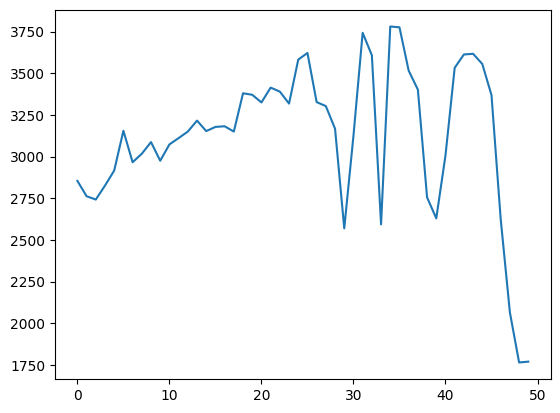

In [ ]:
array = np.array([2854, 2762, 2742, 2826, 2916, 3155, 2966, 3017, 3087, 2975, 3073, 3111, 3150, 3216, 3153, 3178, 3182, 3150, 3380, 3371, 3325, 3414, 3390, 3318, 3582, 3622, 3327, 3303, 3167, 2569, 3125, 3743, 3608, 2593, 3781, 3776, 3516, 3402, 2755, 2629, 3007, 3533, 3613, 3617, 3556, 3369, 2625, 2064, 1764, 1769, 3943, 3397, 1248, 1240, 1297, 2771, 4069, 5255, 6360, 6275, 6243, 6210, 6123, 6003, 5806, 5579, 5396, 5004, 3978, 2586, 849, 269, 509, 546, 1261, 2485, 2938, 2998, 3240, 3284, 3634, 4025, 4396, 4331, 3894, 3446, 3822, 3796, 3339, 2628, 1960, 1177, 682, 146, 1, 1, 1, 1, 1, 1, 20, 35, 15, 55, 133, 87, 140, 466, 1057, 1465, 1802, 2040, 2193, 2245, 2226, 2066, 2037, 2098, 2031, 2042, 2190, 2180, 2119, 2088, 2005, 1932, 1862, 1794, 1693, 1583, 1456, 1302, 1194, 1129, 933, 650, 394, 194, 52, 25, 34, 37, 29, 25, 2, 1, 1, 1, 1, 1, 1, 1, 4, 9, 49, 184, 310, 267, 73, 99, 339, 538, 477, 320, 320, 408, 483, 490, 516, 510, 493, 528, 512, 467, 455, 456, 446, 444, 421, 448, 459, 423, 391, 354, 330, 322, 307, 268, 267, 224, 244, 215, 148, 158, 126, 74, 68, 66])
plt.plot(array[:50])

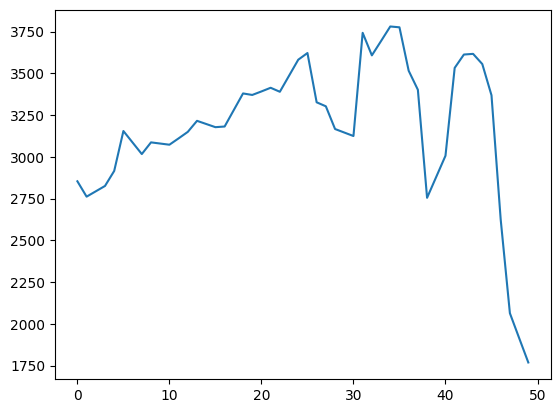

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

array = np.array([2854, 2762, 2742, 2826, 2916, 3155, 2966, 3017, 3087, 2975, 3073, 3111, 3150, 3216, 3153, 3178, 3182, 3150, 3380, 3371, 3325, 3414, 3390, 3318, 3582, 3622, 3327, 3303, 3167, 2569, 3125, 3743, 3608, 2593, 3781, 3776, 3516, 3402, 2755, 2629, 3007, 3533, 3613, 3617, 3556, 3369, 2625, 2064, 1764, 1769, 3943, 3397, 1248, 1240, 1297, 2771, 4069, 5255, 6360, 6275, 6243, 6210, 6123, 6003, 5806, 5579, 5396, 5004, 3978, 2586, 849, 269, 509, 546, 1261, 2485, 2938, 2998, 3240, 3284, 3634, 4025, 4396, 4331, 3894, 3446, 3822, 3796, 3339, 2628, 1960, 1177, 682, 146, 1, 1, 1, 1, 1, 1, 20, 35, 15, 55, 133, 87, 140, 466, 1057, 1465, 1802, 2040, 2193, 2245, 2226, 2066, 2037, 2098, 2031, 2042, 2190, 2180, 2119, 2088, 2005, 1932, 1862, 1794, 1693, 1583, 1456, 1302, 1194, 1129, 933, 650, 394, 194, 52, 25, 34, 37, 29, 25, 2, 1, 1, 1, 1, 1, 1, 1, 4, 9, 49, 184, 310, 267, 73, 99, 339, 538, 477, 320, 320, 408, 483, 490, 516, 510, 493, 528, 512, 467, 455, 456, 446, 444, 421, 448, 459, 423, 391, 354, 330, 322, 307, 268, 267, 224, 244, 215, 148, 158, 126, 74, 68, 66])

# Remove outliers by replacing them with the average of neighboring values
def remove_outliers(array, window_size=3, threshold=2):
    smoothed = np.array(array)  # Make a copy of the array to avoid modifying the original
    for i in range(1, len(array) - 1):
        window = array[max(0, i - window_size):i + window_size + 1]
        if (array[i] < array[i - 1]) and (array[i] < array[i + 1]):
            smoothed[i] = (array[i - 1] + array[i + 1]) / 2  # Replace with the average of neighbors
        elif abs(array[i] - np.mean(window)) > threshold * np.std(window):
            smoothed[i] = np.mean(window)
    return smoothed

smoothed_array = remove_outliers(array[:50], window_size=3, threshold=2)

plt.plot(smoothed_array)
plt.show()


In [ ]:
import ee
import geemap
import matplotlib.pyplot as plt

# Initialize Earth Engine
ee.Initialize()

# Define the coordinates
latitude = 37.50
longitude = -99.514

# Create a point geometry
point = ee.Geometry.Point([longitude, latitude])

# Load Hyperion imagery
hyperion = ee.ImageCollection("EO1/HYPERION") \
    .filterBounds(point) \
    .filterDate('2007-08-08', '2007-08-09') \
    .first()

# Print the date and time of the Hyperion imagery
acquisition_time = ee.Date(hyperion.get('system:time_start')).format('YYYY-MM-dd HH:mm:ss').getInfo()
print("Date and time of the Hyperion imagery:", acquisition_time)

# Create a Map object
Map = geemap.Map(center=[latitude, longitude], zoom=12)

# Add the Hyperion imagery to the map
Map.addLayer(hyperion, {'bands': ['B050', 'B023', 'B015'], 'min': 1000, 'max': 14000, 'gamma': 2.5}, 'Hyperion')

# Add a marker for the selected point
Map.addLayer(point, {'color': 'red'}, 'Selected Point')

# Define a function to get band values at a point
def get_value(coords):
    value = hyperion.sample(coords, 100).first()
    return value

all_band_values = []

# Define a callback function to handle map clicks
def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        lonlat = kwargs.get('coordinates')
        point = ee.Geometry.Point(lonlat[1], lonlat[0])
        band_values = get_value(point)
        print("Clicked coordinates:", lonlat)
        band_values_list = list(band_values.getInfo()['properties'].values())
        band_values_keys = [int(key[1:]) for key in band_values.getInfo()['properties'].keys()]
        all_band_values.append(band_values_list)
        print("Band values:", band_values_list)

        # Plot all clicked points on the same graph
        plt.figure(figsize=(10, 6))
        for values in all_band_values:
            plt.plot(band_values_keys, values)
        plt.xlabel('Band Index')
        plt.ylabel('Pixel Value')
        plt.title('Band Values at Clicked Locations')
        plt.legend()
        plt.show()

        # Add a marker at the clicked location
        marker = ee.Feature(point, {'marker_color': 'blue'})
        Map.addLayer(marker, {}, 'Clicked Point')

# Add the click event handler to the map
Map.on_interaction(handle_click)

# Display the map
Map


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import ee
import geemap
import matplotlib.pyplot as plt

# Initialize Earth Engine
ee.Initialize()

# Define the coordinates
# [37.187884620699016, -99.64272280662148]
latitude = 37.50
longitude = -99.514

# Create a point geometry
point = ee.Geometry.Point([longitude, latitude])

# Load Hyperion imagery
hyperion = ee.ImageCollection("EO1/HYPERION") \
    .filterBounds(point) \
    .filterDate('2007-08-08', '2007-08-09') \
    .first()

# Print the date and time of the Hyperion imagery
acquisition_time = ee.Date(hyperion.get('system:time_start')).format('YYYY-MM-dd HH:mm:ss').getInfo()
print("Date and time of the Hyperion imagery:", acquisition_time)

# Create a Map object
Map = geemap.Map(center=[latitude, longitude], zoom=12)

# Add the Hyperion imagery to the map
Map.addLayer(hyperion, {'bands': ['B050', 'B023', 'B015'], 'min': 1000, 'max': 14000, 'gamma': 2.5}, 'Hyperion')

# Add a marker for the selected point
Map.addLayer(point, {'color': 'red'}, 'Selected Point')

# Define a function to get band values at a point
def get_value(coords):
    value = hyperion.sample(coords, 90).first()
    return value

all_band_values = []

# Define a callback function to handle map clicks
def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        lonlat = kwargs.get('coordinates')
        point = ee.Geometry.Point(lonlat[1], lonlat[0])
        band_values = get_value(point)
        print("Clicked coordinates:", lonlat)
        band_values_list = list(band_values.getInfo()['properties'].values())
        band_values_keys = [int(key[1:]) for key in band_values.getInfo()['properties'].keys()]
        all_band_values.append(band_values_list)
        print("Band values:", band_values_list)

        # Plot all clicked points on the same graph
        plt.figure(figsize=(10, 6))
        for values in all_band_values:
            plt.plot(band_values_keys, values)
        plt.xlabel('Band Index')
        plt.ylabel('Pixel Value')
        plt.title('Band Values at Clicked Locations')
        plt.legend()
        plt.show()

        # Add a marker at the clicked location
        marker = ee.Feature(point, {'marker_color': 'blue'})
        Map.addLayer(marker, {}, 'Clicked Point')

# Add the click event handler to the map
Map.on_interaction(handle_click)

# Display the map
Map


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
array = np.array([2773, 2676, 2583, 2688, 2751, 2910, 2698, 2741, 2762, 2639, 2764, 2793, 2842, 2974, 3037, 3150, 3236, 3263, 3504, 3492, 3430, 3505, 3445, 3368, 3626, 3661, 3343, 3287, 3130, 2520, 3024, 3607, 3497, 2468, 3614, 3628, 3358, 3239, 2608, 2465, 2815, 3288, 3356, 3359, 3306, 3137, 2454, 1855, 1517, 1426, 4030, 3338, 1161, 1111, 1319, 2683, 3731, 4958, 5991, 5969, 5775, 5735, 5637, 5615, 5570, 5332, 5077, 4712, 3725, 2422, 835, 233, 470, 516, 1166, 2362, 2804, 2888, 3085, 3138, 3498, 3834, 4112, 4048, 3700, 3264, 3546, 3547, 3068, 2412, 1828, 1121, 650, 164, 1, 1, 1, 1, 7, 4, 2, 9, 1, 37, 198, 131, 216, 600, 1233, 1696, 2045, 2323, 2492, 2556, 2515, 2291, 2280, 2353, 2257, 2253, 2407, 2387, 2225, 2196, 2160, 2129, 2069, 1971, 1845, 1768, 1655, 1482, 1335, 1251, 1078, 756, 462, 232, 53, 18, 18, 18, 16, 12, 17, 17, 1, 1, 1, 1, 1, 1, 7, 15, 82, 257, 421, 364, 97, 132, 441, 752, 685, 484, 512, 655, 770, 799, 838, 835, 832, 871, 836, 742, 690, 685, 654, 636, 622, 660, 654, 646, 605, 572, 550, 556, 501, 440, 481, 407, 403, 362, 293, 310, 262, 196, 184, 233])


3440

In [ ]:
max_consecutive_increasing = 0
max_consecutive_array = None

for array in band_values:
    consecutive_count = 0
    for i in range(len(array) - 1):
        if array[i + 1] > array[i]:
            consecutive_count += 1
        else:
            consecutive_count = 0
        if consecutive_count > max_consecutive_increasing:
            max_consecutive_increasing = consecutive_count
            max_consecutive_array = array

print("Maximum number of consecutive increasing elements:", max_consecutive_increasing)
print("Array with maximum consecutive increasing elements:", max_consecutive_array)

Maximum number of consecutive increasing elements: 6
Array with maximum consecutive increasing elements: [ 1  1 64  1  1 33  1 17 12 38 10  1  1  3 20 11  1  1  1 22  1 11 20 15
  8  1 15 15  1  1  1  6  1  1  1  1  1  3  5  1  1  1  1  4  9 15 16 35
 36  1]


In [ ]:
import ee
import folium

# Authenticate to the Earth Engine servers
# ee.Initialize()

# Define the Hyperion image properties
entity_id = "EO1H0122032005211110KF_PF1_01"
acquisition_date = '2005-07-30'
target_path = '12'
target_row = '203'
coordinates = [79.302565, 28.536866]

# Define the center coordinates and radius for the circular ROI
center_coords = coordinates
radius = 1000  # Adjust the radius as needed

# Create a circular region of interest (ROI) centered at the given coordinates
roi = ee.Geometry.Point(center_coords).buffer(radius)

# Define the date range for filtering Hyperion imagery
start_date = '2000-01-01'
end_date = '2023-12-31'

# Load the Hyperion image collection
hyperion = ee.ImageCollection("EO1/HYPERION").filterDate(start_date, end_date)

# Filter the Hyperion image collection by the ROI and select the first image
hyperion_img = hyperion.filterBounds(roi).first()

# Get the thumbnail URL of the Hyperion image
thumbnail_url = hyperion_img.getThumbURL({'bands': ['B030', 'B020', 'B010'], 'min': 0, 'max': 6000, 'gamma': 2.5, 'scale': 20})
print("Thumbnail URL:", thumbnail_url)

# Create a folium map centered around the coordinates
map = folium.Map(location=center_coords, zoom_start=10)

# Add the Hyperion image as a thumbnail overlay to the map
folium.Marker(location=center_coords, popup="Hyperion Image").add_to(map)
folium.TileLayer(thumbnail_url, attr="Hyperion Image", name="Hyperion Image").add_to(map)

# Display the map
map


Thumbnail URL: https://earthengine.googleapis.com/v1/projects/ee-112001033/thumbnails/d9eae8a136f295992eaa6825f25b41ff-802402eb0fbe5c78e21ea8dde6002263:getPixels


In [ ]:
len(band_values)

1893

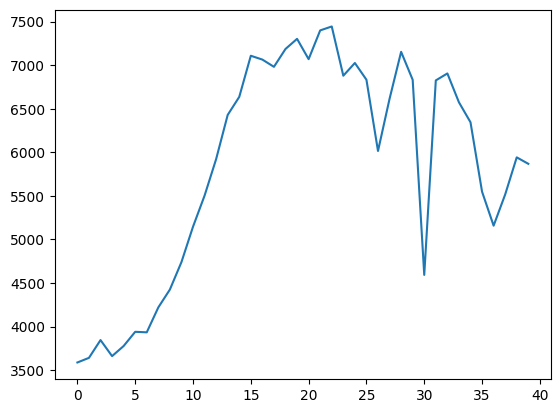

In [ ]:
plt.plot((band_values[0])[:40])

In [ ]:
import ee
import folium
import numpy as np

# Authenticate to the Earth Engine servers
# ee.Initialize()

# Define the place name
place_name = "New York City"

center_coords = [19.1, 51.9]

# Define the radius of the circular ROI (in meters)
radius = 27000  # Change this value to your desired radius

# Create a circular region of interest (ROI) centered at the given coordinates
roi = ee.Geometry.Point(center_coords).buffer(radius)

# Define the date range for filtering Hyperion imagery
start_date = '2000-02-22'
end_date = '2023-02-25'

# Load the Hyperion image collection
hyperion = ee.ImageCollection("EO1/HYPERION").filterDate(start_date, end_date)

# Filter the Hyperion image collection by the ROI and select the first image
hyperion_img = hyperion.filterBounds(roi).limit(5000).first()

# Get the thumbnail URL of the Hyperion image
thumbnail_url = hyperion_img.getThumbURL({'bands': ['B037', 'B021', 'B015'], 'min': 0, 'max': 6000, 'gamma' : 2.5, 'scale': 50})
print(thumbnail_url)

# Get the coordinates for the geometry
coords = roi.coordinates().getInfo()
print(len(coords[0]))

# Create a folium map centered around the coordinates
map = folium.Map(location=[coords[0][0][1], coords[0][0][0]], zoom_start=12)

# Add the Hyperion image as a thumbnail overlay to the map
folium.Marker(location=[coords[0][0][1], coords[0][0][0]], popup=place_name).add_to(map)
folium.TileLayer(thumbnail_url, attr="Hyperion Image", name="Hyperion Image").add_to(map)

# Get pixel values for the entire patch
patch_values = hyperion_img.sample(region=roi, scale=50).getInfo()
print(patch_values)

# Extract band values from the patch values
band_values = np.array([[pixel['properties'][f'B{band:03d}'] for band in range(11, 58)] for pixel in patch_values['features']])

# Determine the dimensions of the image
num_rows = hyperion_img.getInfo()['bands'][0]['dimensions'][0]
num_cols = hyperion_img.getInfo()['bands'][0]['dimensions'][1]

# print
print((band_values[20]))
df = pd.DataFrame(band_values)
# Display the map
display(map)

# Print the shape of the band values 3D array
# print("Shape of band values 3D array:", band_values_3d.shape)


https://earthengine.googleapis.com/v1/projects/ee-112001033/thumbnails/e0350e370536875ed380f9644b6fcee4-5842f19e0c8df7af94a1f2b065ace523:getPixels
24
{'type': 'FeatureCollection', 'columns': {'B008': 'Short', 'B009': 'Short', 'B010': 'Short', 'B011': 'Short', 'B012': 'Short', 'B013': 'Short', 'B014': 'Short', 'B015': 'Short', 'B016': 'Short', 'B017': 'Short', 'B018': 'Short', 'B019': 'Short', 'B020': 'Short', 'B021': 'Short', 'B022': 'Short', 'B023': 'Short', 'B024': 'Short', 'B025': 'Short', 'B026': 'Short', 'B027': 'Short', 'B028': 'Short', 'B029': 'Short', 'B030': 'Short', 'B031': 'Short', 'B032': 'Short', 'B033': 'Short', 'B034': 'Short', 'B035': 'Short', 'B036': 'Short', 'B037': 'Short', 'B038': 'Short', 'B039': 'Short', 'B040': 'Short', 'B041': 'Short', 'B042': 'Short', 'B043': 'Short', 'B044': 'Short', 'B045': 'Short', 'B046': 'Short', 'B047': 'Short', 'B048': 'Short', 'B049': 'Short', 'B050': 'Short', 'B051': 'Short', 'B052': 'Short', 'B053': 'Short', 'B054': 'Short', 'B055': '

In [ ]:
len(band_values)

84

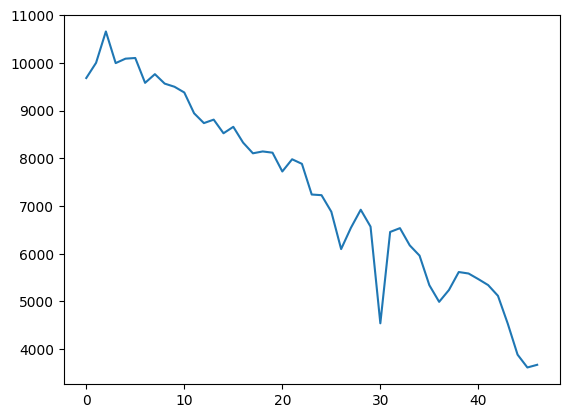

In [ ]:
plt.plot(band_values[0])

In [ ]:
import ee
import folium

# Authenticate to the Earth Engine servers
# ee.Initialize()

# Define the place name
place_name = "New York City"

center_coords = [76.2, 14.4]

# Define the radius of the circular ROI (in meters)
radius = 1000  # Change this value to your desired radius

# Create a circular region of interest (ROI) centered at the given coordinates
roi = ee.Geometry.Point(center_coords).buffer(radius)

# Define the date range for filtering EO1 ALI imagery
start_date = '2000-02-22'
end_date = '2023-02-25'

# Load the EO1 ALI image collection
ali = ee.ImageCollection("EO1/ALI").filterDate(start_date, end_date)

# Filter the ALI image collection by the ROI and select the first image
ali_img = ali.filterBounds(roi).limit(5000).first()

# Get the thumbnail URL of the ALI image
thumbnail_url = ali_img.getThumbURL({'bands': ['30', '20', '10']})

# Get the coordinates for the geometry
coords = roi.coordinates().getInfo()

# Create a folium map centered around the coordinates
map = folium.Map(location=[coords[0][0][1], coords[0][0][0]], zoom_start=12)

# Add the ALI image as a thumbnail overlay to the map
folium.Marker(location=[coords[0][0][1], coords[0][0][0]], popup=place_name).add_to(map)
folium.TileLayer(thumbnail_url, attr="EO1 ALI Image", name="EO1 ALI Image").add_to(map)

# Display the map
map


EEException: Image.visualize: Parameter 'image' is required.

In [ ]:
band_values

array([[ 4452,  4547,  4769, ...,  1846,  1629,  1564],
       [ 6072,  6352,  6738, ...,  2498,  2227,  2192],
       [ 6834,  6994,  7462, ...,  2698,  2374,  2432],
       ...,
       [ 7808,  8207,  8769, ...,  3218,  2838,  2865],
       [ 8756,  9181,  9769, ...,  3573,  3162,  3241],
       [ 9294,  9734, 10358, ...,  3847,  3345,  3454]])

In [ ]:
import ee
import folium
import numpy as np

# Authenticate to the Earth Engine servers
# ee.Initialize()

# Define the place name
place_name = "New York City"

center_coords = [-76.8, -6.51]

# Define the radius of the circular ROI (in meters)
radius = 2000  # Change this value to your desired radius

# Create a circular region of interest (ROI) centered at the given coordinates
roi = ee.Geometry.Point(center_coords).buffer(radius)

# Define the date range for filtering Hyperion imagery
start_date = '2000-02-22'
end_date = '2023-02-25'

# Load the Hyperion image collection
hyperion = ee.ImageCollection("EO1/HYPERION").filterDate(start_date, end_date)

# Filter the Hyperion image collection by the ROI and select the first image
hyperion_img = hyperion.filterBounds(roi).first()

# Get the thumbnail URL of the Hyperion image
thumbnail_url = hyperion_img.getThumbURL({'bands': ['B023', 'B050', 'B014'], 'min': 1000, 'max': 14000, 'gamma' : 2.5, 'scale': 50})
print(thumbnail_url)

# Get the coordinates for the geometry
coords = roi.coordinates().getInfo()
print(len(coords[0]))

# Create a folium map centered around the coordinates
map = folium.Map(location=[coords[0][0][1], coords[0][0][0]], zoom_start=12)

# Add the Hyperion image as a thumbnail overlay to the map
folium.Marker(location=[coords[0][0][1], coords[0][0][0]], popup=place_name).add_to(map)
folium.TileLayer(thumbnail_url, attr="Hyperion Image", name="Hyperion Image").add_to(map)

# Get pixel values for the entire patch
patch_values = hyperion_img.sample(region=roi, scale=50).getInfo()
print(patch_values)

# Extract band values from the patch values
band_values = np.array([[pixel['properties'][f'B{band:03d}'] for band in (range(11, 58) and range(77, 224))] for pixel in patch_values['features']])

# Determine the dimensions of the image
num_rows = hyperion_img.getInfo()['bands'][0]['dimensions'][0]
num_cols = hyperion_img.getInfo()['bands'][0]['dimensions'][1]

# print
print((band_values[20]))
df = pd.DataFrame(band_values)
# Display the map
display(map)

# Print the shape of the band values 3D array
# print("Shape of band values 3D array:", band_values_3d.shape)


https://earthengine.googleapis.com/v1/projects/ee-112001033/thumbnails/e0a8f132bf60a7fbae4f83a075e3af72-194b38c84e678b4189d76ad49f57957b:getPixels
24


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[3095 2852  977  825  932 1880 2654 3729 4399 4455 4508 4530 4483 4405
 4449 4282 3936 3552 2907 1888  680  168  286  286  596 1318 1631 1580
 1708 1739 1974 2151 2312 2324 2200 1921 2096 2038 1740 1281  970  589
  314   96   45   40    1    1   25   31   25   31    1    1    1    1
   53  110  198  272  369  431  472  512  537  531  513  519  541  553
  586  592  549  550  532  519  505  486  456  404  377  339  288  271
  228  164  106   65   29   28   19   24   12   19    1    1    3    1
    1    1    1    1   10   12    1    1    3    1   17   16   48   64
   34   19   64   71   62   67   72   84   59   56   87   82   60   62
   69   60   52   60   92   90   61   57   51   52   45   43   50   46
    4    1   15   24    1    1    1]


In [ ]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1960,1915,1918,1696,1615,1584,1441,1476,1455,1434,...,2138,2425,2468,2420,2382,2277,1867,1456,1357,1280
1,1985,1908,1937,1749,1621,1579,1482,1489,1470,1449,...,2385,2677,2675,2676,2604,2488,2026,1617,1430,1446
2,1759,1736,1746,1539,1475,1396,1308,1349,1346,1311,...,2055,2327,2391,2340,2281,2166,1790,1451,1322,1243
3,1806,1739,1752,1558,1473,1426,1323,1319,1289,1253,...,1780,1982,2000,1985,1955,1849,1554,1243,1109,1074
4,1859,1771,1808,1598,1534,1450,1337,1389,1372,1336,...,2066,2357,2345,2361,2293,2192,1830,1445,1259,1234
5,1966,1929,1937,1697,1628,1590,1441,1476,1467,1448,...,2243,2494,2524,2519,2446,2318,1928,1593,1332,1329
6,1976,1889,1917,1665,1623,1540,1415,1465,1436,1402,...,1957,2170,2214,2173,2123,2032,1670,1330,1169,1085
7,1768,1718,1747,1548,1455,1412,1318,1333,1304,1296,...,1975,2200,2227,2206,2152,2047,1699,1370,1182,1109
8,1773,1706,1752,1547,1479,1435,1280,1315,1287,1272,...,1670,1886,1865,1838,1820,1716,1438,1155,1012,910
9,1778,1758,1769,1589,1483,1430,1327,1344,1337,1292,...,1900,2113,2131,2133,2081,1952,1663,1272,1153,1068


In [ ]:
import ee
import folium
import numpy as np

# Authenticate to the Earth Engine servers
# ee.Initialize()

# Define the place name
place_name = "New York City"

# Define the center coordinates
center_coords = [71.2, 26.9]

# Define the radius of the circular ROI (in meters)
radius = 64000  # Change this value to your desired radius

# Create a circular region of interest (ROI) centered at the given coordinates
roi = ee.Geometry.Point(center_coords).buffer(radius)

# Define the date range for filtering Hyperion imagery
start_date = '2000-02-22'
end_date = '2023-02-25'

# Load the Hyperion image collection
hyperion = ee.ImageCollection("EO1/HYPERION").filterDate(start_date, end_date)

# Filter the Hyperion image collection by the ROI and select the first image
hyperion_img = hyperion.filterBounds(roi).limit(5000).first()

# Get the thumbnail URL of the Hyperion image
thumbnail_url = hyperion_img.getThumbURL({'bands': ['B023', 'B050', 'B014'], 'min': 1000, 'max': 14000, 'gamma' : 2.5, 'scale': 50})

# Get the coordinates for the geometry
coords = roi.coordinates().getInfo()

# Create a folium map centered around the coordinates
map = folium.Map(location=[coords[0][0][1], coords[0][0][0]], zoom_start=12)

# Add the Hyperion image as a thumbnail overlay to the map
folium.Marker(location=[coords[0][0][1], coords[0][0][0]], popup=place_name).add_to(map)

# Add a rectangle overlay to restrict the thumbnail tile layer to the area covered by the circular ROI
rectangle = folium.Rectangle(bounds=[[coords[0][0][1], coords[0][0][0]], [coords[0][2][1], coords[0][2][0]]], fill=True, fill_color='transparent', color='red', weight=1)
rectangle.add_to(map)

# Add the Hyperion image as a tile layer only to the area covered by the circular ROI
folium.TileLayer(thumbnail_url, attr="Hyperion Image", name="Hyperion Image").add_to(map)

# Display the map
map


In [ ]:
band_values[0]

array([4769, 4898, 5251, 4928, 5043, 5189, 5028, 5258, 5332, 5433, 5557,
       5639, 5645, 5858, 5787, 6071, 5970, 5844, 5906, 5858, 5665, 5923,
       5898, 5422, 5309, 5037, 4235, 4709, 5313, 5127, 3453, 5059, 5146,
       4821, 4633, 3903, 3620, 3972, 4449, 4473, 4449, 4281, 4020, 3375,
       2609, 2367, 2429])

In [ ]:
import ee
import folium

# Authenticate to the Earth Engine servers
ee.Initialize()

# Define the place name
place_name = "New York City"

# Get the region of interest (ROI) coordinates
roi = ee.Geometry.Point(-73.935242, 40.730610)  # Coordinates for New York City

# Load the Hyperion image collection
hyperion = ee.ImageCollection("EO1/HYPERION")

# Filter the Hyperion image collection by the ROI and select the first image
hyperion_img = hyperion.filterBounds(roi).first()

# Get the thumbnail URL of the Hyperion image
thumbnail_url = hyperion_img.getThumbURL({'bands': ['B050', 'B023', 'B015'], 'min': 100, 'max': 14000, 'gamma': 2.5})

# Get the coordinates for the geometry
coords = roi.coordinates().getInfo()

# Create a folium map centered around the coordinates with a high zoom level
map = folium.Map(location=[coords[1], coords[0]], zoom_start=18)  # Zoom level set to 18 for smallest possible patch

# Add the Hyperion image as a thumbnail overlay to the map
folium.Marker(location=[coords[1], coords[0]], popup=place_name).add_to(map)
folium.TileLayer(thumbnail_url, attr="Hyperion Image", name="Hyperion Image").add_to(map)

# Display the map
display(map)


In [ ]:
!pip install git+https://github.com/giswqs/folium-gee.git

  Cloning https://github.com/giswqs/folium-gee.git to /tmp/pip-req-build-oxxukkg4
  Running command git clone --filter=blob:none --quiet https://github.com/giswqs/folium-gee.git /tmp/pip-req-build-oxxukkg4
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/giswqs/folium-gee.git /tmp/pip-req-build-oxxukkg4 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/giswqs/folium-gee.git /tmp/pip-req-build-oxxukkg4 did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
rgbVis

{'min': 1000.0, 'max': 14000.0, 'gamma': 2.5}

In [ ]:
import folium
from folium import plugins

# define map
map = folium.Map(location=[-77.3463, 162.0044], zoom_start=9)

# Add the RGB layer to the map
map.add_ee_layer(rgb.median(), rgb_vis_params, 'RGB')

# Display the map
display(map)

AttributeError: 'Map' object has no attribute 'add_ee_layer'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# GENERAL UTILITIES
import os
from glob import glob
import pandas as pd
from  tqdm.notebook import tqdm
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

# MODEL DEVELOPMENT DEPENDENCIES
import numpy as np
import pywt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
def load_data_1d(gt_file_path):

  labels = pd.read_csv(gt_file_path)
  train_data, test_data = train_test_split(labels, test_size=0.2)

  return train_data, test_data

In [ ]:
gt_data_path = "/content/drive/MyDrive/BTP/train_data/train_data/train_gt.csv"

# Loading training raw data
train_data, test_data = load_data_1d(gt_data_path)

In [ ]:
train_data.shape

(1385, 5)

In [ ]:
train_data.head()

,sample_index,P,K,Mg,pH
758,758,48.5,215.0,140.0,6.3
1614,1614,97.3,222.0,151.0,6.8
836,836,74.5,243.0,137.0,6.7
287,287,43.3,220.0,198.0,6.4
596,596,46.5,180.0,179.0,7.1


In [ ]:
y_train = train_data[['K']]
y_test = test_data[['K']]
X_train = train_data.drop(columns=['sample_index', 'K'])
X_test = test_data.drop(columns=['sample_index', 'K'])

In [ ]:
X_train.head()

,P,Mg,pH
758,48.5,140.0,6.3
1614,97.3,151.0,6.8
836,74.5,137.0,6.7
287,43.3,198.0,6.4
596,46.5,179.0,7.1


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the model
model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(3, 1)),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2)  # No activation function for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Using mean squared error loss for regression

# Print model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 3, 64)             128       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 3, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               24704     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                      

In [ ]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 2541.3115 - mae: 37.4475


[2541.3115234375, 37.447486877441406]

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 6ms/step - loss: 8.1358 - mae: 2.1782


[8.135807037353516, 2.1781575679779053]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 2563.4816096990457
Coefficients: [[ 0.91523416  0.45579969 27.72463699]]
Intercept: [-96.54416592]


In [ ]:
import numpy as np
import h5py

# Load calibrated radiance data from l1r file
with open('/content/drive/MyDrive/BTP/EO1H0420352015236110K2_1R/EO1H0420352015236110K2/EO1H0420352015236110K2.L1R', 'rb') as f:
    radiance_data = np.fromfile(f, dtype=np.int16)

# Load metadata from hdr file
# with h5py.File('/content/drive/MyDrive/BTP/EO1H0420352015236110K2_1R/EO1H0420352015236110K2/EO1H0420352015236110K2.hdr', 'r') as f:
#     bands = f['bands'].value
#     rows = f['rows'].value
#     cols = f['cols'].value
#     wavelengths = f['wavelengths'][:].astype(float)

# # Reshape the radiance data based on the dimensions
# radiance_data = radiance_data.reshape(bands, rows, cols)

# Load calibration coefficients from aux file
with h5py.File('/content/drive/MyDrive/BTP/EO1H0420352015236110K2_1R/EO1H0420352015236110K2/EO1H0420352015236110K2.AUX', 'r') as f:
    gain = f['gain'][:]
    offset = f['offset'][:]
    k1 = f['k1'].value
    k2 = f['k2'].value

# Convert radiance to reflectance
reflectance_data = (radiance_data - offset) * gain
reflectance_data = reflectance_data / (k1 * np.cos(k2 * np.pi / 180.0))

# Extract reflectance values for specific wavelengths
wavelengths_of_interest = [670, 800, 1600]  # Example wavelengths in nanometers
bands_of_interest = [np.where(wavelengths == w)[0][0] for w in wavelengths_of_interest]
reflectance_values = reflectance_data[bands_of_interest, :, :]

OSError: Unable to open file (file signature not found)

In [ ]:
242 * 3400 * 256

210636800

In [ ]:
radiance_data

array([   782,    275, -14336, ...,    768,      0,      0], dtype=int16)

In [ ]:
radiance_data[:150]

array([   782,    275, -14336,      0,      0,   7680,    256,      0,
        27145,      0,  23552, -16894,    768,      0, -14839,   7193,
           32, -21753,   1024,   7193, -14807,      0,   1024, -22009,
         1024,   7193, -13783,      0,  15360, -21241,   1280,   7193,
         1578,      0,   8448, -21753,   1536,   7193,  10026,      0,
         1024, -22009,   1536,   7193,  11050,      0,  15360, -21241,
         1792,   7193,  26410,      0,   8448, -21753,   2048,   7193,
       -30678,      0,   1024, -22009,   2048,   7193, -29654,      0,
        15360, -21241,   2304,   7193, -14294,      0,   8448, -21753,
         2560,   7193,  -5846,      0,   1024, -22009,   2560,   7193,
        -4822,      0,  19968, -21753,   2816,   7193,  15147,      0,
         1024, -22009,   2816,   7193,  16171,      0,  19968, -21753,
         3072,   7193, -29397,      0,   1024, -22009,   3072,   7193,
       -28373,      0,  16640, -21753,   3328,   7193, -11733,      0,
      

In [ ]:
# Read metadata from a text-based hdr file
gain = []
offset = []
k1 = []
k2 = []
i = 0
with open('/content/drive/MyDrive/BTP/EO1H0420352015236110K2_1R/EO1H0420352015236110K2/EO1H0420352015236110K2.AUX', 'rb') as f:
    lines = f.read()
    for line in lines:
        if(i % 4 == 0):
          gain.append(line)
        elif(i % 4 == 1):
          offset.append(line)
        elif(i % 4 == 2):
          k1.append(line)
        else:
          k2.append(line)
        i = i + 1
        if(i % 10000000 == 0):
          print(i)

10000000
20000000
30000000
40000000
50000000
60000000
70000000
80000000
90000000
100000000
110000000
120000000
130000000
140000000
150000000
160000000
170000000
180000000
190000000
200000000
210000000


In [ ]:
import numpy as np
import h5py

# Read calibrated radiance data from L1R file
with open('/content/drive/MyDrive/BTP/EO1H0420352015236110K2_1R/EO1H0420352015236110K2/EO1H0420352015236110K2.L1R', 'rb') as f_l1r:
    radiance_data = np.fromfile(f_l1r, dtype=np.int16)

# Display some information
print("Radiance data shape:", radiance_data.shape)
print("Gain:", len(gain))
print("k2:", len(k2))


Radiance data shape: (210639220,)
Gain: 52846471
k2: 52846470


In [ ]:
radiance_data1

KeyboardInterrupt: 

In [ ]:
bands

242

In [ ]:
rows

NameError: name 'rows' is not defined

In [ ]:
import numpy as np

# Open the AUX file in binary mode
with open('/content/drive/MyDrive/BTP/EO1H0420352015236110K2_1R/EO1H0420352015236110K2/EO1H0420352015236110K2.AUX', 'rb') as f:
    # Read the entire content of the file into radiance_data1
    radiance_data = np.fromfile(f, dtype=np.int16)
radiance_data = np.array(radiance_data)
radiance_data = radiance_data.reshape(242, 256, 3400, -1)[:, :, :, 0]

ValueError: cannot reshape array of size 105692941 into shape (242,256,3400,newaxis)

In [ ]:
242*256*3400

210636800

In [ ]:
210636800/2

105318400.0

In [ ]:
radiance_data[-20:]

array([12360, 12852, 13104, 12853, 12592, 12853, 13875, 12593, 19248,
       11826, 21825,    88, 17158, 17988, 11824,    48,     0,     0,
           3,     0], dtype=int16)

In [ ]:
radiance_data[:20]

array([   782,    275, -14336,      0,      0,   7680,    256,      0,
        27145,      0,  23552, -16894,    768,      0, -14839,    768,
          200, -16894,   1280,    768], dtype=int16)

In [ ]:
reflectance_data = radiance_data / (np.max(radiance_data, axis=0) + 1e-10)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 42.3 MB/s eta 0:00:00


In [ ]:
import rasterio

# Open the TIF file for a specific band
band_file = "/content/drive/MyDrive/BTP/EO1H1500412016345110Kw_1T/EO1H1500412016345110Kw_B008_L1T.TIF"
band_file2 = "/content/drive/MyDrive/BTP/EO1H1500412016345110Kw_1T/EO1H1500412016345110Kw_B029_L1T.TIF"
with rasterio.open(band_file) as src:
    # Read the entire band into a numpy array
    band_array = src.read(1)  # Assuming it's a single-band image

with rasterio.open(band_file2) as src:
    band_array2 = src.read(1)  # Assuming it's a single-band image

print(band_array.shape)
# Now you can access pixel values from the `band_array`
# For example, to get the pixel value at row 100, column 50:
maxi = 0
maxj = 0
slope = -10000
for i in range(band_array.shape[0]):
  for j in range(band_array.shape[1]):
    if(band_array[i][j] != 0 and i != 4423 and j != 693):
      if(band_array2[i][j] - band_array[i][j] > slope):
        maxi = i
        maxj = j
        slope = band_array2[i][j] - band_array[i][j]

print(maxi, maxj, slope)


(7051, 1831)
4427 690 2458


In [ ]:
print(band_array[7][738])

3510


In [ ]:
import matplotlib.pyplot as plt

img_ = plt.imread('/content/drive/MyDrive/BTP/EO1H1450402010043110PF_1GST/EO1H1450402010043110PF/EO1H1450402010043110PF_B025_L1GST.TIF')

In [ ]:
print(img_[1501][450])

[255 255 255 255]


In [ ]:
import cv2
img = cv2.imread("/content/drive/MyDrive/BTP/EO1H1450402010043110PF_1GST/EO1H1450402010043110PF/EO1H1450402010043110PF_B025_L1GST.TIF", 0)

In [ ]:
import numpy as np

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if(img[i][j] > 10 and img[i][j] < 15):
      print(i, j)

In [ ]:
img[782][806]

11

In [ ]:
14, 14, 13, 12, 11

In [ ]:
2514, 2557, 2627, 2659, 2449, 2383,

In [ ]:
sum = np.sum(band_values)

In [ ]:
sum

196246904

In [ ]:
def average_non_zero(arr):
    total = 0
    count = 0
    for row in arr:
        for value in row:
            if value != 0:
                total += value
                count += 1
    if count == 0:
        return 0  # To avoid division by zero error
    else:
        return total / count

In [ ]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 10.3 MB/s eta 0:00:00


In [ ]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def extract_pixel_values(folder_path, n, m):
    tif_files = [file for file in os.listdir(folder_path) if file.endswith('.TIF')]
    tif_files.sort()

    pixel_values = []
    for file_name in tif_files:
        file_path = os.path.join(folder_path, file_name)
        with rasterio.open(file_path) as src:
            for val in src.sample([(n, m)]):  # Note the order of m and n
                pixel_value = val
                print(pixel_value)
            # print(pixel_value)  # Assuming a single band image
            pixel_values.append(pixel_value)  # Append the pixel value

    return pixel_values

def plot_pixel_values(pixel_values):
    plt.plot(pixel_values)
    plt.xlabel('Image Index')
    plt.ylabel('Pixel Value')
    plt.title('Pixel Values at (n, m)')
    plt.show()

# Example usage:
folder_path = "/content/drive/MyDrive/BTP/EO1H1450402010043110PF_1GST/EO1H1450402010043110PF"
n = 1616  # Example value for n
m = 500   # Example value for m
pixel_values = extract_pixel_values(folder_path, n, m)
plot_pixel_values(pixel_values)


ModuleNotFoundError: No module named 'rasterio'

In [ ]:
pixel_values

[]